# Setiment analysis on film Reviews__Lion King movie reviews

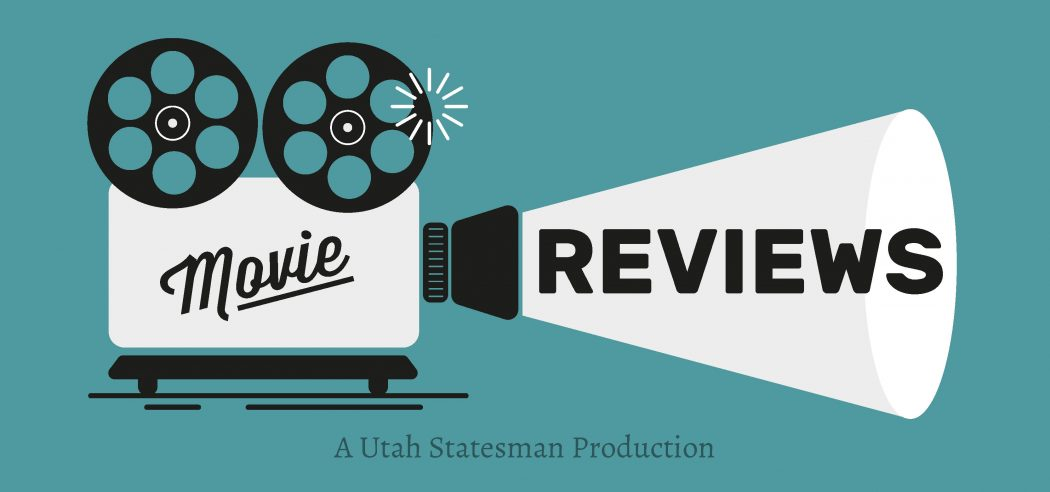

_This project about sentiment analysis on online reviews of film Lion King from rotten tomottes site_

__Problem Statement__
- Online reviews are important because they have become a reference point for buyers
across the globe and because so many people trust them when making purchase
decisions For the audience and booking websites, analysing reviews is significant in
understanding reviewer opinion about the film. In movie booking websites, 90% of
people first check out online reviews before purchasing tickets.
For the production house, analysing negative reviews can be useful for damage control

_Tasks in this script_
- Webscraping of 3000 reviews from rotten tomatoes site as per requirement-

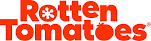

### Importing required libraries

In [7]:
#!pip install requests
import numpy as np
import pandas as pd
import requests
import time


# Fetching data from rotten tomato site

In [8]:
headers = {
'Referer': 'https://www.rottentomatoes.com/m/the_lion_king_2019/reviews?type=user',
'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.108 Safari/537.36',
'X-Requested-With': 'XMLHttpRequest',
}

In [9]:
payload = {
'direction': 'next',
'endCursor': '',
'startCursor': '',
}

In [10]:
s = requests.Session()

In [11]:
url = 'https://www.rottentomatoes.com/napi/movie/9057c2cf-7cab-317f-876f-e50b245ca76e/reviews/user'

###  Getting single page review

In [12]:
rawdata = s.get(url, headers=headers, params=payload) # GET Call
jsonData = rawdata.json()

In [13]:
jsonData.keys()

dict_keys(['pageInfo', 'reviews'])

In [14]:
RottenTomato = {'UsedID':[], 'UserName':[], 'Review':[], 'Rating':[], 'Date':[]}
jsonReviews = jsonData['reviews']
for i in jsonReviews:
    RottenTomato['UsedID'].append(i['user']['userId'])
    RottenTomato['UserName'].append(i['user']['displayName'])
    RottenTomato['Review'].append(i['review'])
    RottenTomato['Rating'].append(i['score'])
    RottenTomato['Date'].append(i['createDate'])

In [15]:
type(RottenTomato)

dict

In [16]:
for i in RottenTomato:
    print(RottenTomato[i],"\n")
moviewreview_df=pd.DataFrame(RottenTomato, columns=['UsedID', 'UserName', "Review", "Rating", "Date"])


['4ac6d27e-eee2-45ee-b7d1-8beda3635e9c', 'a147a39f-ee2e-408e-ae07-874e93f0d225', '978119067', '978217415', '3EE3713A-E261-4562-9A2C-C6316FF768F5', '6ba6303a-0f50-406a-9384-44c875a66be3', '978208872', 'aa7fdcc2-db5b-455a-8ee8-80f7d80ffcd9', 'd7077647-7e81-4f6a-bf6c-c9617d60dedb', 'd47c39d5-19ce-40a8-96cc-761b45fa3120'] 

['Kathleen', 'kimberly d', 'Doug G', 'Diogo O', 'V0hayga', 'Ashley B', 'Edson G', 'Barbara S', 'DJO', 'PATRICIA J'] 

["Good for all ages.  Good lessons, good story, great graphics.  I'd see it again.", "I like that it followed the animation movie pretty close & it's just an overall terrific movie no matter which version you watch.", 'Great movie..feeling the nostalgia for sure..left out a few parts from the otiginal but overall great feeling for this one. I would recommend this to anyone.', 'Infelizmente no filme acaba com o brilho da inf√¢ncia... O primeiro, o desenho era encantador fazia sonhar .\nEste parece mais um filme do tim burro , n√£o tem encanto. Parece que 

In [17]:
moviewreview_df

UsedID    UserName  \
0  4ac6d27e-eee2-45ee-b7d1-8beda3635e9c    Kathleen   
1  a147a39f-ee2e-408e-ae07-874e93f0d225  kimberly d   
2                             978119067      Doug G   
3                             978217415     Diogo O   
4  3EE3713A-E261-4562-9A2C-C6316FF768F5     V0hayga   
5  6ba6303a-0f50-406a-9384-44c875a66be3    Ashley B   
6                             978208872     Edson G   
7  aa7fdcc2-db5b-455a-8ee8-80f7d80ffcd9   Barbara S   
8  d7077647-7e81-4f6a-bf6c-c9617d60dedb         DJO   
9  d47c39d5-19ce-40a8-96cc-761b45fa3120  PATRICIA J   

                                              Review  Rating  \
0  Good for all ages.  Good lessons, good story, ...     5.0   
1  I like that it followed the animation movie pr...     5.0   
2  Great movie..feeling the nostalgia for sure..l...     4.5   
3  Infelizmente no filme acaba com o brilho da in...     2.0   
4  great for those who have never seek the origin...     3.0   
5  I wasn't sure if this would be that great afte...     5.0   
6  Just watch the original. This movie just doesn...     2.0   
7  very well done and entertaining\nreally enjoye...     4.0   
8                      The animation was spectacular     4.0   
9             I liked everything! Super great movie!     5.0   

                       Date  
0  2019-08-30T03:13:36.138Z  
1  2019-08-30T02:17:18.670Z  
2  2019-08-30T01:53:24.594Z  
3  2019-08-30T01:44:34.141Z  
4  2019-08-30T01:37:31.448Z  
5  2019-08-30T01:08:33.118Z  
6  2019-08-30T00:22:19.448Z  
7  2019-08-29T23:58:21.800Z  
8  2019-08-29T23:22:36.548Z  
9  2019-08-29T23:19:33.081Z

## Getting other page reviews

#### Used for extraction of reviews

In [18]:
#import time
# import requests


    
# headers = {
#     'Referer': 'https://www.rottentomatoes.com/m/notebook/reviews?type=user',
#     'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.108 Safari/537.36',
#     'X-Requested-With': 'XMLHttpRequest',
# }

# url = 'https://www.rottentomatoes.com/napi/movie/00d1dd5b-5a41-3248-9080-3ef553dd9015/reviews/user'

# payload = {
#     'direction': 'next',
#     'endCursor': '',
#     'startCursor': '',
# }
# data = {'UsedID':[], 'UserName':[], 'Review':[], 'Rating':[], 'Date':[]}
# sess = requests.Session()

# while True:
#     r = sess.get(url, headers=headers, params=payload)
#     datar = r.json()


#     payload['endCursor'] = datar['pageInfo']['endCursor']
#     payload['startCursor'] = datar['pageInfo']['startCursor']
    
#     if not datar['pageInfo']['hasNextPage']:
#         break

#     for x in datar['reviews']: 
#         data['UsedID'].append(x['user']['userId'])
#         data['UserName'].append(x['user']['displayName'])
#         data['Review'].append(x['review'])
#         data['Rating'].append(x['score'])
#         data['Date'].append(x['createDate'])
#         df = pd.DataFrame(data)
        
#     if len(df.index)>=3000:
#         break
# time.sleep(5)
# df.head(2)    
   

In [19]:
#df.to_csv('phddata.csv')

## Data Exploration

_The work has been done is as follows__
- Reading  the data
- Understanding the data
- Exploratory analysis of variables
- Visualization of data

_Reading data_

In [88]:
df = pd.read_csv('phddata.csv', header = 0)

_Understanding data_

In [23]:
print(df.shape)
df.columns

(3000, 6)


Index(['Unnamed: 0', 'UsedID', 'UserName', 'Review', 'Rating', 'Date'], dtype='object')

In [24]:
df.isnull().sum()

Unnamed: 0     0
UsedID         0
UserName      17
Review         0
Rating         0
Date           0
dtype: int64

In [25]:
df.head()

Unnamed: 0     UsedID  UserName  \
0           0  814590660   Craig W   
1           1  977260167  Victor C   
2           2  978109321   Garin M   
3           3  978175723   Tommy B   
4           4  978079261   Jason N   

                                              Review  Rating  \
0  The notebook.  Upon searching the best romanti...     0.5   
1                  Excelente,  sensibiliza la trama.     5.0   
2  It's a cheesy love story. It didn't make my cry.      1.0   
3       Must see if you want to bawl your eyes out!!     5.0   
4  Some scenes i sit there and say "how is this c...     2.0   

                       Date  
0  2019-08-24T21:46:57.257Z  
1  2019-08-22T15:14:09.626Z  
2  2019-08-15T18:43:44.457Z  
3  2019-07-28T16:39:29.798Z  
4  2019-07-25T00:59:12.500Z

### Counting words of Review column

In [26]:
df['word_count'] = [len(text.split(' ')) for text in df['Review']]

In [27]:
pd.DataFrame(df['word_count']).describe()

word_count
count  3000.000000
mean     19.271667
std      53.760121
min       1.000000
25%       6.000000
50%       9.000000
75%      16.000000
max    1427.000000

In [28]:
#Getting the index of maximum word in the reviews
df['word_count'].idxmax()

498

In [29]:
#Getting reviews of 498th index
df.iloc[498,[3]].values

array(['By 2004, they had, like, twelve adaptations of Nicholas Sparks books, and it took them this long to get around to adapting his first one. Hey, whatever, I welcome it, because this film is actually pretty good, and we seriously need compensation for "A Walk to Remember", not just between 2002 and 2004, but still to this day, yet that didn\'t stop the critics from having some kind of bias that kept them from liking this. Hey, I can\'t say that I went into this film thinking, "From the director of \'John Q\' comes an adaptation of a book by the author of \'A Walk to Remember\' that I\'m sure will not stink", nor did I walk away finding it awesome, but make no mistake, this film is better than they say, even though it does have its cheesy moments. Hey, when this film came out, Ryan Gosling had just got done playing a Neo-Nazi and some teenager who brutally murdered people... in two separate films, so it was about time for him to do something a bit fluffier, much like Rachel McAdams

_Obsevation_
 - In 497th review maximum length(1668) of review is there. Narrated the story and each and every section of movie
 - 75% 0f data has legnth of review less than 20
 
***

## Working with Date attribute

In [30]:
#Converting data to date datatype 
df['Date'] = pd.to_datetime(df['Date'],infer_datetime_format=True)

In [31]:
df.dtypes

Unnamed: 0                  int64
UsedID                      int64
UserName                   object
Review                     object
Rating                    float64
Date          datetime64[ns, UTC]
word_count                  int64
dtype: object

In [32]:
import datetime as dt
from datetime import datetime

#Define a function to get month in word for better readable format__

def get_month(x):
    return dt.datetime.strftime(x, format = '%b')

df['Month'] = df.loc[:,'Date'].apply(get_month)

In [33]:
df["count"]=1
df.head()

Unnamed: 0     UsedID  UserName  \
0           0  814590660   Craig W   
1           1  977260167  Victor C   
2           2  978109321   Garin M   
3           3  978175723   Tommy B   
4           4  978079261   Jason N   

                                              Review  Rating  \
0  The notebook.  Upon searching the best romanti...     0.5   
1                  Excelente,  sensibiliza la trama.     5.0   
2  It's a cheesy love story. It didn't make my cry.      1.0   
3       Must see if you want to bawl your eyes out!!     5.0   
4  Some scenes i sit there and say "how is this c...     2.0   

                              Date  word_count Month  count  
0 2019-08-24 21:46:57.257000+00:00         334   Aug      1  
1 2019-08-22 15:14:09.626000+00:00           5   Aug      1  
2 2019-08-15 18:43:44.457000+00:00          11   Aug      1  
3 2019-07-28 16:39:29.798000+00:00          10   Jul      1  
4 2019-07-25 00:59:12.500000+00:00          32   Jul      1

In [34]:
df['year'] = df['Date'].dt.year


In [35]:
#Grouping total count of reviewer in year wise

temp_yearTotal=pd.Series(df[['year', 'count' ]].groupby('year')['count'].sum())
temp_yearTotal

year
2012    2125
2013     573
2014     143
2015      37
2016      30
2017      33
2018      31
2019      28
Name: count, dtype: int64

In [38]:
tempUser.keys()

Index(['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov',
       'Oct', 'Sep'],
      dtype='object', name='Month')

In [36]:
#Getting total count of reviewer for each month

tempUser=pd.Series(df[['Month', 'count' ]].groupby('Month')['count'].sum())
tempUser

Month
Apr    367
Aug    184
Dec    186
Feb    110
Jan    178
Jul    439
Jun    499
Mar    117
May    477
Nov    128
Oct    155
Sep    160
Name: count, dtype: int64

In [37]:
# Monthwise Review score sum
tempUser=pd.Series(df[['Month', 'Rating' ]].groupby('Month')['Rating'].sum())
tempUser

Month
Apr    1625.0
Aug     779.5
Dec     783.0
Feb     453.0
Jan     748.5
Jul    1957.5
Jun    2224.5
Mar     489.5
May    2109.0
Nov     546.5
Oct     607.5
Sep     674.5
Name: Rating, dtype: float64

In [39]:
tempMean=pd.Series(df[['Month', 'Rating' ]].groupby('Month')['Rating'].mean())

tempMean
    

Month
Apr    4.427793
Aug    4.236413
Dec    4.209677
Feb    4.118182
Jan    4.205056
Jul    4.458998
Jun    4.457916
Mar    4.183761
May    4.421384
Nov    4.269531
Oct    3.919355
Sep    4.215625
Name: Rating, dtype: float64

__Observations:__
- Film Lion King got max review in the year 2012 based on the data retrived from 'Rotten Tomatoes' site even though the site is aquired by Warner Bros in 2011
- The film got review score an average of 4.5 during June month followed by April(4.4)

### The distribution of review sentiment polarity score

#### Getting higher polarity negative comments
- New column for sentiment polarity. Two new columns for lengths of the review and word count.

In [42]:
import textblob
from textblob import TextBlob

In [43]:
df['polarity'] = df['Review'].map(lambda text: TextBlob(text).sentiment.polarity)
df['review_len'] = df['Review'].astype(str).apply(len)
df['word_count'] = df['Review'].apply(lambda x: len(str(x).split()))

In [44]:
print('5 random reviews with the highest positive sentiment polarity: \n')
cl = df.loc[df.polarity == 1, ['Review']].sample(5).values

for c in cl:
    print(c[0])

5 random reviews with the highest positive sentiment polarity: 

it is simply wonderful.
very beautiful movie
best tear-jerker ever, great movie!!
An amazing movie!!!!!
Best movie ever!
I don't care what anyone says.....
this movie just does it for me!!!


In [45]:
print('5 random reviews with the most neutral sentiment(zero) polarity: \n')
cl = df.loc[df.polarity == 0, ['Review']].sample(5).values
for c in cl:
    print(c[0])

5 random reviews with the most neutral sentiment(zero) polarity: 

One of the sweetest movies i've ever seen, i'm a teenager though, what do i know, but i even cried once or twice. Very romantic.
This movie will make you impotent...
Wow...what can I say!!!
this is a must see romantic movie... couples should watch together.
favey romance film but don't over-watch it


In [46]:
df.polarity.min()

-1.0

In [47]:
df.loc[df.polarity == -1.0]

Unnamed: 0     UsedID    UserName  \
247          247  953691565       Joe C   
368          368  954897376   Claudio V   
688          688  940263432   Jessica J   
925          925  797700549     Livvy B   
990          990  868444810  Jennifer A   
1142        1142  936172465     Chris D   
1439        1439  921067750     Devon B   
1650        1650  932364039    Jeremy D   
2161        2161  911409230     Raven R   
2621        2621  879762410  Catalina R   
2926        2926  925394287     Lydia R   

                                                 Review  Rating  \
247                                OMG, that was awful.     1.5   
368                   One of the Worst films ever made!     0.5   
688            Incredibly boring. Didn't feel anything.     2.0   
925                       sounds boring, never seen it.     1.0   
990   Hated it! But then again I don't like movies t...     1.0   
1142                 worst movie ever....she was a slut     0.5   
1439                             LOVE...made me cry :'(     5.0   
1650  Not to bad for a Chick Flick...Kelly made me w...     4.0   
2161  A terrible adaptation of a terrible novel that...     0.5   
2621                    THIS MOVIE EFFING ROCKED!!!!!!!     5.0   
2926                  This app is stupid!!!!!!!!!!!!!!!     0.5   

                          Date  word_count Month  count  year  Sentiment  \
247  2014-04-16 16:19:03+00:00           4   Apr      1  2014          1   
368  2013-10-08 10:45:11+00:00           7   Oct      1  2013          1   
688  2013-02-17 16:33:17+00:00           5   Feb      1  2013          1   
925  2012-12-22 16:18:00+00:00           5   Dec      1  2012          1   
990  2012-12-08 13:29:01+00:00          13   Dec      1  2012          1   
1142 2012-10-22 08:40:28+00:00           6   Oct      1  2012          1   
1439 2012-08-12 20:35:49+00:00           4   Aug      1  2012          0   
1650 2012-07-16 20:09:27+00:00          11   Jul      1  2012          0   
2161 2012-06-10 16:24:12+00:00          14   Jun      1  2012          1   
2621 2012-05-08 20:22:53+00:00           4   May      1  2012          0   
2926 2012-04-22 14:53:46+00:00           4   Apr      1  2012          1   

      polarity  review_len  
247       -1.0          20  
368       -1.0          33  
688       -1.0          40  
925       -1.0          29  
990       -1.0          62  
1142      -1.0          34  
1439      -1.0          22  
1650      -1.0          56  
2161      -1.0          91  
2621      -1.0          31  
2926      -1.0          33

In [48]:
print('5 reviews with the most negative polarity: \n')
cl = df.loc[df.polarity == -1.0, ['Review']].sample(5).values
for c in cl:
    print(c[0])

5 reviews with the most negative polarity: 

LOVE...made me cry :'(
THIS MOVIE EFFING ROCKED!!!!!!!
One of the Worst films ever made!
worst movie ever....she was a slut
This app is stupid!!!!!!!!!!!!!!!


_Observation_
- In the negative review "LOVE...made me cry :'(" ---> This is actually positive review, maybe because of sad smiley or because the word appearing 'cry' may made this review catogorized  as negative review


## Data Visualization

### Target variable analysising

In [40]:
df['Sentiment'] = df['Rating'].apply(lambda x: 1 if x <= 3 else 0)

In [52]:
df['Sentiment'].value_counts('normalize')*100

0    84.466667
1    15.533333
Name: Sentiment, dtype: float64

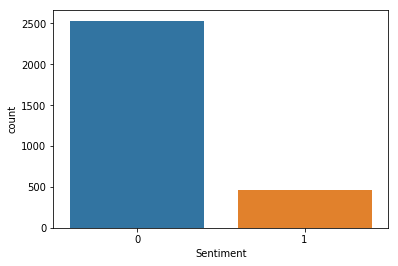

In [54]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.countplot(x='Sentiment',data=df)
plt.show()

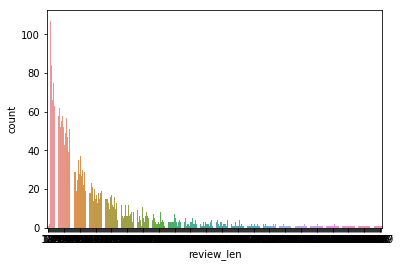

In [55]:
df['review_len'] = df['Review'].astype(str).apply(len)
sns.countplot(x='review_len',data=df)
plt.show()

### Ploting words in worldcloud

In [56]:
#!pip install wordcloud

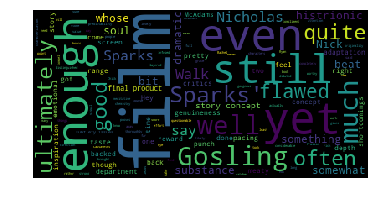

In [57]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(df['Review'][498])
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

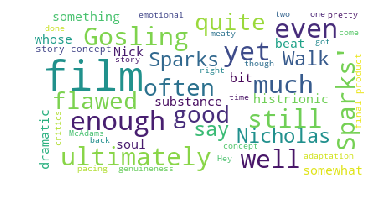

In [58]:
wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(df['Review'][498])
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Ploting most frequent words (Without stop-words)

In [59]:
from nltk.corpus import stopwords

In [61]:
stop = stopwords.words('english')
reviews_sp_removed = [token for token in df['Review'] if token not in stop]
print(reviews_sp_removed)

["The notebook.  Upon searching the best romantic films, this seems to be at the top of the pile?  WHY?\nSo, let's get into the story.   A story about a girl and a love triangle.  A girl that can't decide if she wants a bit of rough, someone who looks good with a beard, a wife beater vest and who can build things (like a house), OR.. if she wants money, someone with a good job, health insurance, keeps you hydrated and looks good in a suit.\nAnd that's it really, a few sub plots in the future but mainly her trying to decide who she wants to be with throughout; in this utterly clich√©d bullsh$t film.\n\nNext the characters. So the Girl:  Indecisive.  Doesn't really do a lot for feminists. She gets married to the money and then cheats with the rough. Fantastic. Complete b*tch.\nThen, Gosling: mental problems and a narcissist.  Can't take no for an answer - in the beginning, when he gets rejected five or six times, threatens to kill himself for a date.  Sooo romantic! Later on, he writes h

In [63]:
values, counts = np.unique(reviews_sp_removed, return_counts=True)

In [64]:
sorted_indices = np.argsort(-counts)
print(sorted_indices)

[2222 2597 1132 ...  995  986 2967]


In [65]:
values = values[sorted_indices]
counts = counts[sorted_indices]

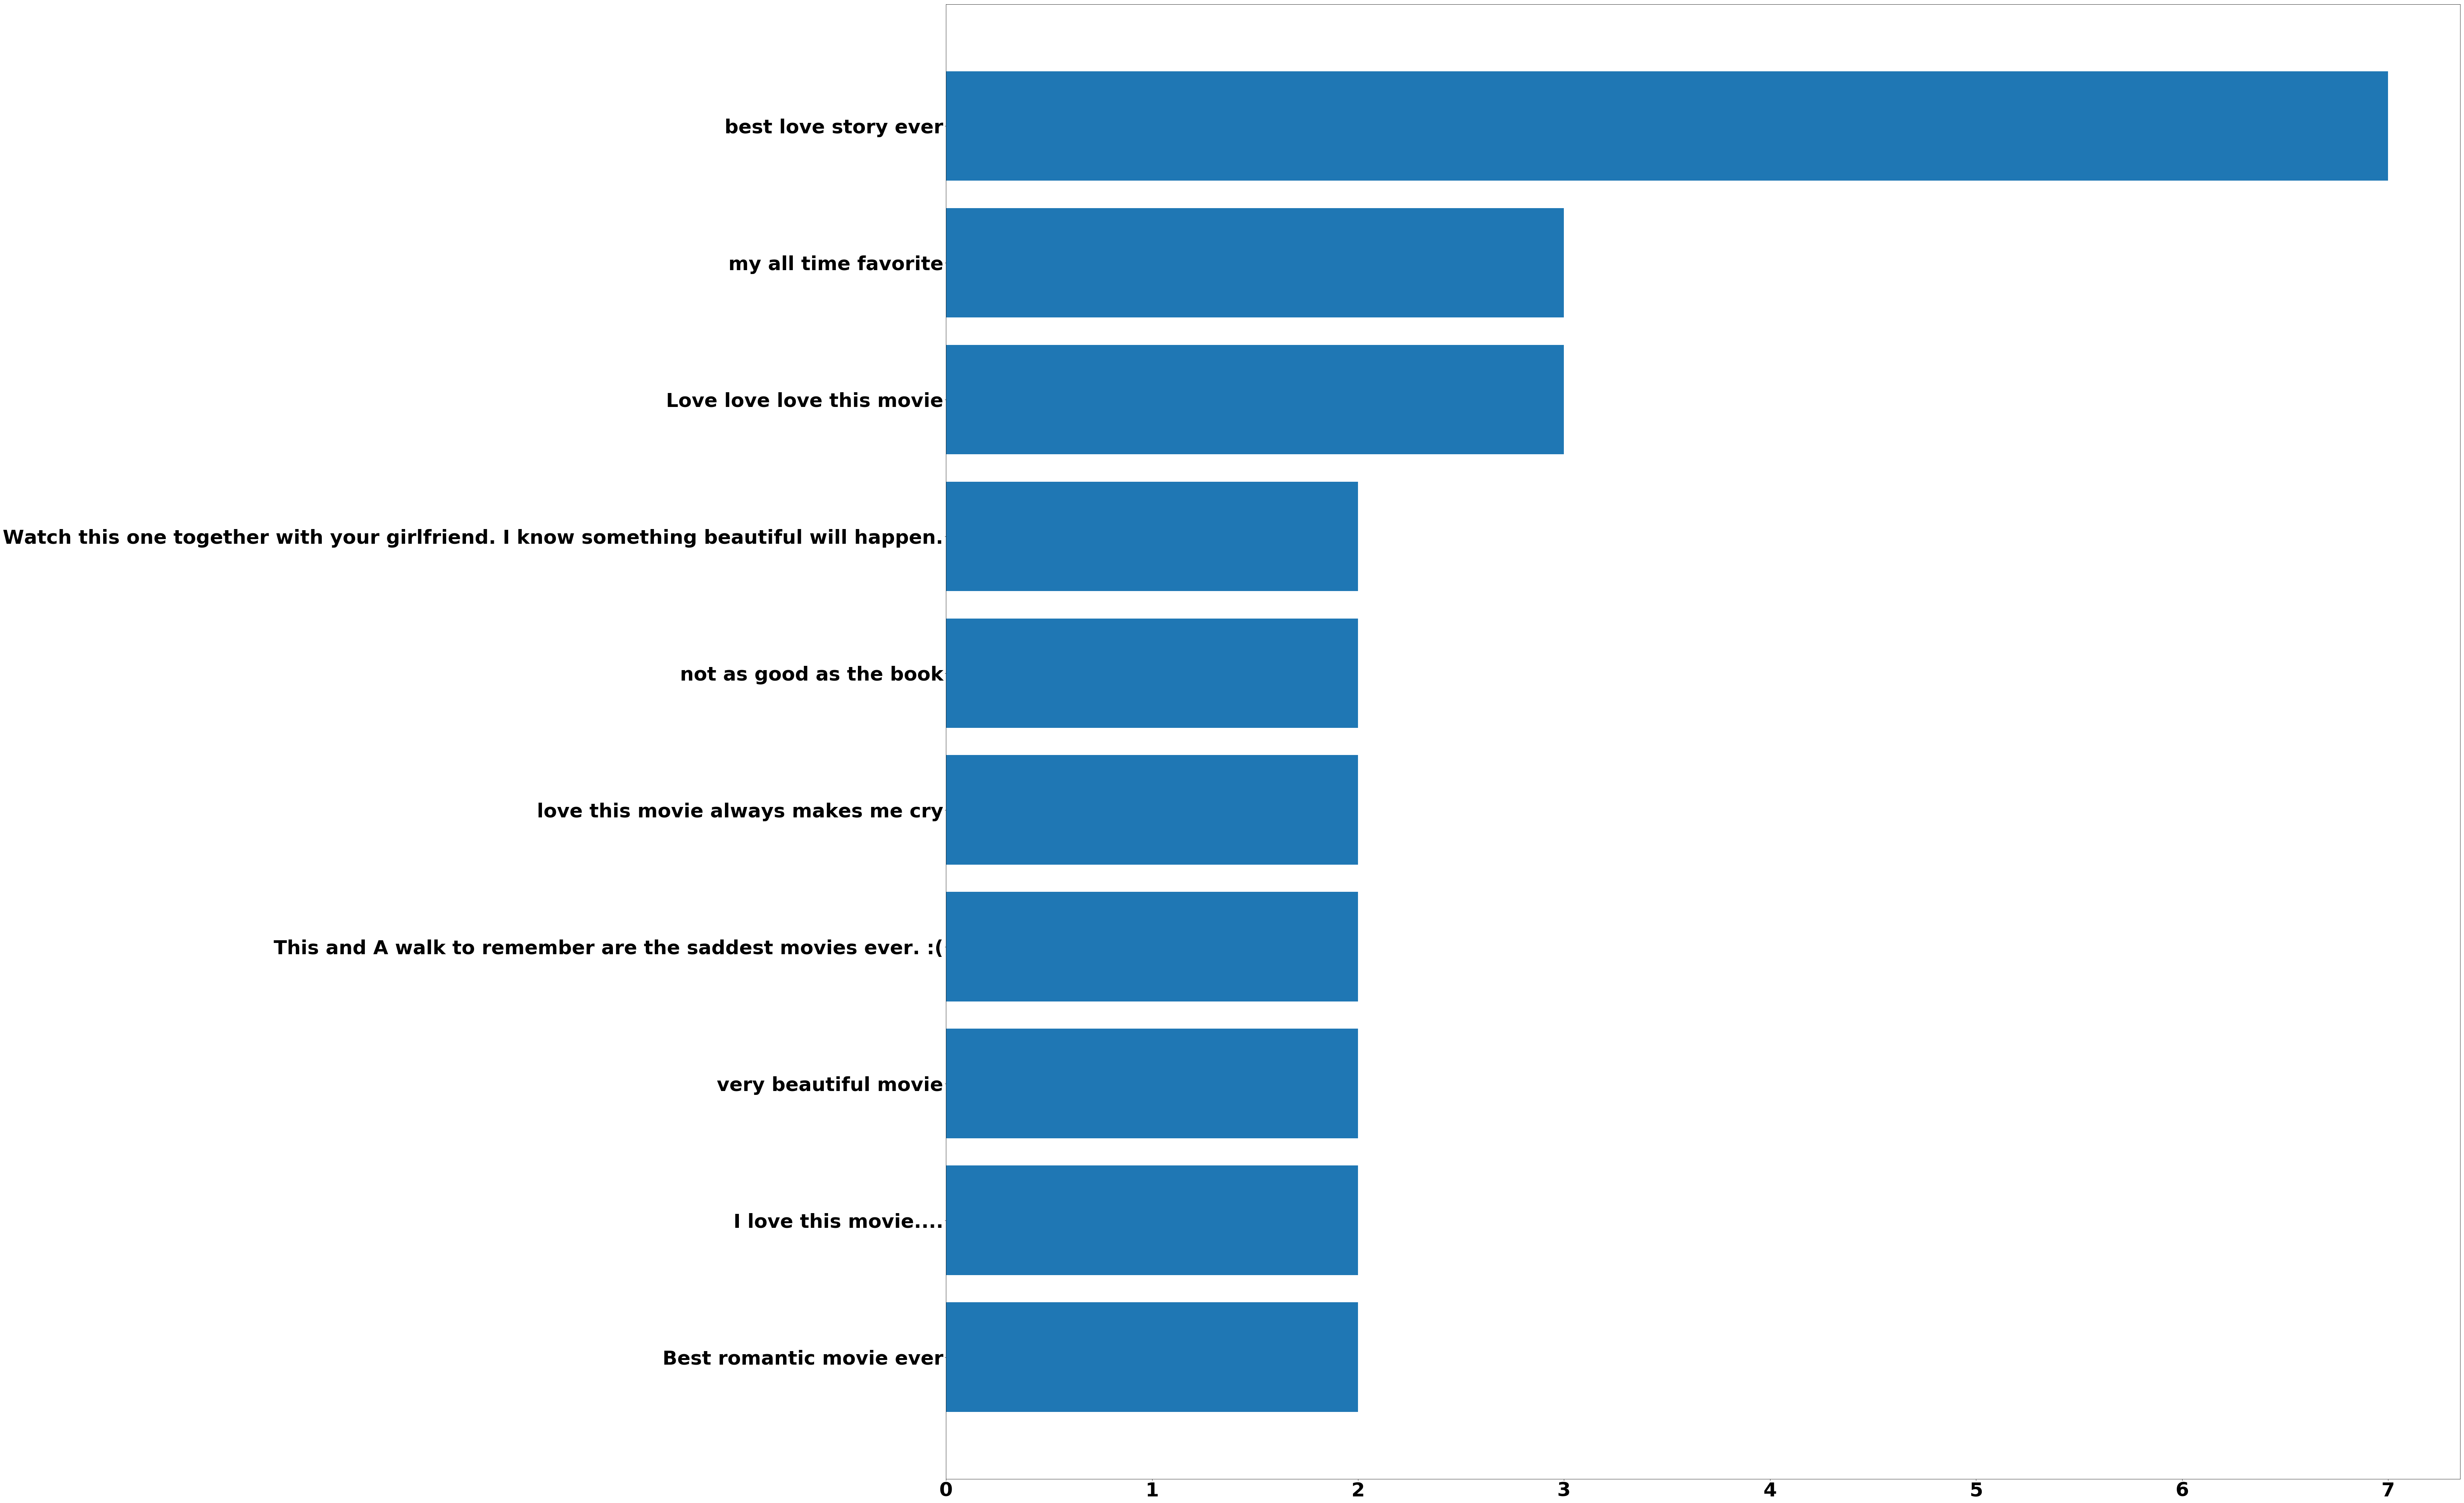

In [67]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 50}

plt.rc('font', **font)
fig = plt.figure(figsize=(70,70))
plt.barh(values[:10], counts[:10])
plt.gca().invert_yaxis()
plt.show()

# Text Preprocessing

## Converting vector  form of Review text

In [89]:
data = df.reset_index().to_dict(orient='list')

In [90]:
#Duplicating the original text extracted before proceeeding with preprocessing steps

import copy
print(type(data['Review']))
original_data = copy.deepcopy(data)
print(data.keys())
print(original_data.keys())

<class 'list'>
dict_keys(['index', 'Unnamed: 0', 'UsedID', 'UserName', 'Review', 'Rating', 'Date'])
dict_keys(['index', 'Unnamed: 0', 'UsedID', 'UserName', 'Review', 'Rating', 'Date'])


#### Convert all the value in Review column text to Lower case

In [91]:
data['Review'] = [Review.strip().lower() for Review in data['Review']]
data['Review'][:10]

["the notebook.  upon searching the best romantic films, this seems to be at the top of the pile?  why?\nso, let's get into the story.   a story about a girl and a love triangle.  a girl that can't decide if she wants a bit of rough, someone who looks good with a beard, a wife beater vest and who can build things (like a house), or.. if she wants money, someone with a good job, health insurance, keeps you hydrated and looks good in a suit.\nand that's it really, a few sub plots in the future but mainly her trying to decide who she wants to be with throughout; in this utterly clich√©d bullsh$t film.\n\nnext the characters. so the girl:  indecisive.  doesn't really do a lot for feminists. she gets married to the money and then cheats with the rough. fantastic. complete b*tch.\nthen, gosling: mental problems and a narcissist.  can't take no for an answer - in the beginning, when he gets rejected five or six times, threatens to kill himself for a date.  sooo romantic! later on, he writes h

In [92]:
#!pip install bs4
from bs4 import BeautifulSoup as bs

import re
import requests
import matplotlib.pyplot as plt

import random
random.seed(123)

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#### Creating a function for contraction

In [71]:
from contractions import CONTRACTION_MAP
import unicodedata

def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        print(contraction)
        print(type(contraction))
        match = contraction.group(0)
        print(match)
        first_char = match[0]
        print(first_char)
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    print(f"The expand match is {expand_match} and text is {text}")
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text


In [94]:
# Calling contraction function

data['Review'] = [expand_contractions(re.sub('‚Äô', "'", text)) for text in data['Review']]

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000000008E95730> and text is the notebook.  upon searching the best romantic films, this seems to be at the top of the pile?  why?
so, let us get into the story.   a story about a girl and a love triangle.  a girl that cannot decide if she wants a bit of rough, someone who looks good with a beard, a wife beater vest and who can build things (like a house), or.. if she wants money, someone with a good job, health insurance, keeps you hydrated and looks good in a suit.
and that is it really, a few sub plots in the future but mainly her trying to decide who she wants to be with throughout; in this utterly clich√©d bullsh$t film.

next the characters. so the girl:  indecisive.  does not really do a lot for feminists. she gets married to the money and then cheats with the rough. fantastic. complete b*tch.
then, gosling: mental problems and a narcissist.  cannot take no for an answer - in the beginning, when he get

this is a film for the ladies only, in my experience, and although there will be some uncomfortable moments if you watch this with your mother it is a staple of sleepovers and hangouts with your female friends. it is no brief encounter (1945) but it is a great mainstream version of a story that is been told since the beginning of time.
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is the notebook to me is the second best romance film of all time beaten out only by ryan goslings 2016 masterpiece la la land. the notebook is sweet, romantic, and is a story within a story. the external plot of duke in the nursing home is sweet and it allows you to sympathize with older couples as well as people who suffer from dementia. the beginning of the story is nice and ryan does a beautiful job bringing emotion to noah. rachel mcadams also pulls off a convincing allie that goes through a lot of character development. noah spends the whole movi

overall, the notebook may not be a classic film, but it is a riveting romance tale with genuine emotion that hits me harder with each viewing of the notebook.
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is a not very thrilling story. i will give the notebook this though. i was sobbing at the end. that does not happen much
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is this movie taught me how to love again
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is love it one of my favorite ones
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is i sat on my fat ass the whole fucking movie
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is good love story. has a good story. sappy love story. a classic. must see 

The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is interesting movie, the love story is good and the story itself is good, girls just cry in every sappy love story i guess, its up to a us men to hold back our tears, and this one did not even need me to hold back mine cause none arose was not that sad at all compared to other stories.
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is a heart-wrenching romance tale
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is this movie makes me want to build my girl a house with my bare hands.
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is classic romance tale. beautiful performance from both lead roles and beautiful plot line.
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> a

The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is i always said that i would never watch the notebook as long as i am single. well, since that as not true anymore, my girlfriend showed me the notebook. i kept hearing that this film was a romantic masterpiece and a real tear jerker. i would not go that far to call it a masterpiece and there was only one really genuine sad moment. i would call it a nice love story with likeable characters. although most of them are one-dimensional, you do end up sympathizing with them. strangely enough, the most interesting character was rachel mcadams mother. she had a backstory and her actions actually made a difference in the plot. if you are looking for a date night movie, this is not a bad one to go with.
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is i am a sucker for this movie, even when it does not make any kind of sense. good tea

The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is with titanic becoming the most popular film of all time financially for 12 years since its release in 1997, so many romance films after it have copied its doomed forbidden love premise and told stories of it to death. the worst thing about it is that titanic was not even original to begin with. the notebook is probably the most popular love story in the post-titanic era to achieve great success with that premise with audiences and at the box office. quite simply put, this film annoys me. not only is it unoriginal in its storytelling but the entire film is treacle. it is always trying to make you care for the characters and their predicaments and is manipulative as ever in that approach. ryan gosling and rachel mcadams are two good looking and charismatic leads but their characters have absolutely no reason to fall in love. their first encounter is bafflingly idiotic in how it lead

The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is yea!! m not much into sparks but dis one reli got me cryin
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is best romance movie!!
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is seriously, skip the movie. pick up the book instead.
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is very touching romantic film my fave film all time funny, sweet sad and memorable you can relate tooth how much you love some one and recommend watching this film and own the film can watch it a number of times
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is great romance has some female nudity and sexuality. ages 14+
The expand match is <function expand_contractions.<locals>.ex

and about the argument that this movies just fantasy designed to make audiences feel good: we tell ourselves made up stories everyday. an example, for instance is telling yourself that your opinion or politics matter at all to the primarily cold and unforgiving universe on the large scale, or on a slightly smaller to a single couple very much in love.
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is the notebook almost succeeds in adequately compensating for its shallow character developments with its sensationally intense, intimate--and perhaps a little excessive--focus on love.
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is one of the best love stories i have ever seen it made me cry laugh and smile
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is one of my favorites!!
The expand match is <function expand_contr

when i was watching this movie, i was moved by scene settings, story, all harmonious background music and actors. the director tends to make scenes very dark and quiet in this movie so it made all scenes impressive for me. sometimes i was likely to cry because of the great choice of back ground music. i think sound effects play a very important role to make the movie interesting. and also i was impressed by their act. ryan gosling who acted the boy named noah was especially nice. his heartrending act brought tears to my eyes. the editor also made rapid shifts of scenes many times, so i was so excited and the technique gave me the feeling of being in the movie. last scene is the biggest happiness for people who have the partner you love, this movie was so sad and painful but finally your heart absolutely can get warmed by the superb ending. it became one of my favorite movies.
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is love

The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is hermosa historia de amor. buen drama, excelente gui√£¬≥n. una historia de amor que rompe con los clich√£ (c)s. las actuaciones fueron muy buenas. 100% recomendada.
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is one of the greatest. i cry like a baby every time.
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is so cheesy and predictable
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is hate it absolute garbage so boring and i hate romantic comedies
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is best love story ever!
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is the notebook rises above the pr

however, i could not help but to notice this film bearing some similarities to my all-time favourite, forrest gump. the notebook is the kind of "perfect" love story most people will fall for but it is sad that i am not buying it. maybe i could like the novel, who knows? it is time to put the notebook away and carry on with life.
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is love this movie! it gets me every time i watch it.
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is good movie to watch with the wifey!
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is great movie of miracles, love, and god.
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is this is a really romantic and beautiful movie.
The expand match is <function expand_contractions.<locals>.expand_m

3/5 - good
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is good movie thought i would get bored but i liked it
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is ok a friend told me to watch it and it is a fine movie!!!!!!
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is this movie is great........it is beautiful......it is about love.......life.......and death.........definitely a tearjerker.......at least one box of kleenex was used in the watching of this movie.
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is all they think about is sex which disgusts me
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is the book is much better... (and no, i am not a girl)
The expand match is <function expand_contrac

The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is it got me. you happy?!
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is a movie to really make you realuze the value of love and the length love will take you
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is i have watched it alot.
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is i am not a fan of this movie cause it makes me cry
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is omg, obvious but good chick movie to nuzzle with
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is quite enjoyed it! one of the best love stories i have ever seen and really is poignant of the emotions! well structured and 

The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is oh, it made me cry...sooo much!!!
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is i also cried when i watched this movie,my daughter even cried!
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is was good but there is to much hype.
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is the best film around.
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is awesome! classic movie
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is amazing story and a true romance film, probably one of my favorites. the ending was also done perfectly. 5/5
The expand match is <function expand_contractions.<locals>.expand_match

The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is it is the best movie ever made. i loved it.
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is very very very good movie
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is wow ppl said it was a powerful movie n i didnt believe them.. noah looks bad witha  beard tho..
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is one of the very best love stories!!
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is i loved this movie it was heartwrenchingly beautiful
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is i generally do not associate romance movies with the word "good", but this is definitely the exception!

The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is a perfect love story that really captures true love in a relationship. i did not think this would be all that great but it was better than i expected. yes the ending was predictable but aside from that it was amazing seeing the love these two had. it had a lot of funny moments and touching ones too. it was cool seeing the story go back and forth from a man telling it to actually seeing the story, like in green mile. for a two hour love story you would think the movie would crawl but it moved so fast i could not believe it was over when it was. everyone was great, it is a perfect love story to watch with your loved one.
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is this one makes me cry,and remembers me a lot of things best love movie ever
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000

The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is i cry every time..... :(
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is again, who does not love this movie?
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is great actors and a great story, but it did not make me feel the things i think it was intended to. if it is a sad movie that did not make me cry..cannot really say it accomplished much for me.
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is cried. like a baby. love this movie.
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is i loved this book!!! and the movie was just as good
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is good drama, bu

The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is a love that stood the test of time.... a tear jerker and a heart touching experience. most will never have the opportunity to ever share a love the way that ali & noah shared....
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is it didnt really have an ending
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is beautiful and terrific story, but so sad!
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is classic love story.. read the book.. i suggest it..and read the wedding.. wonderful.. nicholas sparks.. i honor you
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is i read the book and love the movie
The expand match is <function expand_contractions.<locals>.exp

The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is it is an endearingly sweet tale of true love! you all need to pipe down with your cynicism and realism. why did not you write meee?!
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is one of the best movies i have ever seen!!
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is read the book, and own the movie,love it!!!!!
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is i liked it, but it was way too depressing.
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is this movie was ok, not the greatest but good.
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is makes me cry every time.
The expand match is <fu

The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is this movie absolutely did the book justice,it was truly able to capture the essence of the story and love between noah and ally, i still cannot get sick of watching this movie (& reading the book). true summer romance, & true love all wrapped up in less than 2h.
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is this is absolutely the best love movie ever. i use to watch this movie over and over again and cry. no other movie has been able to measure up to this one.
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is where rachel mcadams & ryan gosling met and fell in love..unfortunately that did not last
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is loved it! watch it over and over!
The expand match is <function

The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is i loved this film! i like rachel mcadams! i love cliche movies anyways.
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is i get that the part about the couple when they were younger wasnt that special, but when they are older and the wife has dementia and the husband visits her and reads to her everyday and hopes she remembers and then they die in eachothers arms. idk the whole thing made me cry it was sooo good
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is man i love this movie so much, rachel mccadams is so amazing in it, i would most deffinetly reccomend it for romance fans
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is i didnt like it, seemed like it was made more 4 an older crowd
The expand match is <

The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is how can anyone dislike this movie? dafuq? ._.
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is i love the move and the book
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is yes, it is a chick flick but it is an extremely worthwhile watch with an absolutely mesmerizing performance by james garner and another great acting job by ryan gosling. hell, even mcadams proved herself to me in this one. not the greatest love story ever, but certainly one to remember. right up there with the classics.
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is the notebook is too good to be true. the story is about an old man named noah who reads a love story from a notebook to an old female patron named allie in a nursing home abou

The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is forced to watch it in school. id suffer through this with my girlfriend but she has to watch terminator or something manly with me afterwards. there are really only 2 scenes that had true emotional impact.
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is i know it a chick fliclk but very good one though
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is i saw it and was in awe of the love story between the two characters, it was touching and at times sad.
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is a must see movie for the adult movie person i give five stars
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is i love this movie....though the end makes m

<i>the notebook</i> is overlong, but not unsatisfying. it is a tear-jerker, and it certainly succeeds at that part. it gives us flawed humans as our main characters, and forces us to spend so much time with them that it is difficult not to relate with them. when the ending, and the twist in the plot, comes, it does make us feel something, although you will be emotional for more of the movie than just that. it is, at times, too slow, but it all leads up to a near-perfect conclusion.
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is best love movie ever!
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is one of my faves, another weepy one
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is it is a very beautiful told love story. it is what a love story should be like my favorite part of the movie is when they both hold eac

The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is this movie the notebook is such a good movie:d i love it!! it is a good love story makes me wanna cry but im a brave girl(: lol well its a good movie and worth watching.. i actually wanna see the vow creators of the notebook(: soo yea you should watch it.. its a cute somewhat funny love storyy(:
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is loved it cried like a baby
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is i love this move i can watch it over and over again n cry every time..,
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is goosebumpingly good!
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is i loved the book so it was an easy transition fo

The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is this is my first time watching this movie. i cried like a baby it is so sad
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is one of the best movies ever
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is not to bad for a chick flick...kelly made me watch it!!!
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is i loved this movie it reminds me of a passionate love with kisses from moves and love that seemed ever lasting
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is this is an amazing love story . i would have to say that this is my favorite love story.
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text 

The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is usually not my kind of movie...felt chick-flicky to me.... but i did wind up crying at the end if the movie.
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is my rating is only because this genre is not among my top 25 movie genres. if parasailing instructional videos didnt exist,love sappy chick flics would have made the chart,coming in at number 25. maybe next time chic flics
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is surprisingly it was a good movie
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is i got this movie free for liking flixster on fb...! what are the odds of that
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is chick flick but a chick

The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is i laughed, i cried, i fell in love!
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is my fav love story!!!
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is while the film has a slow pace and is a little sad as with any of nicholas sparks books, the notebook is a lovely movie that you can expect from an adaptation of sparks novels: a wonderful cast headed by breakout stars ryan gosling and rachel mcadams (coming off of her wonderful performance from mean girls), interesting directing by nick cassavettes (john q), and most but foremost, a beautiful, love story that any couple or boy or girl can enjoy again and again.
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is great for romance finatics!
The expand match is 

The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is finally saw this movie and i have to say i did not think it would be all that good but one day i had nothing else to watch so i caved and watched it and to my surprise i loved it
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is really good movie, i love it
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is my favorite movie of all time!!!! awesome love story
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is this is my new favorite romance movie!! though i figured the plot early on it did not disappoint. i love it. i recommend this to all who love romantic movies. ryan and rachel melted my heart and the ending was so heart warming.
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000

The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is love it this is my favorite movie
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is i cried hope i find that kind of love
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is suprised me, very sad story and ending to a couple.....i will admit it was touching....and this is coming from a guy...i know, i know.
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is i have heard the book is lovely...and i am glad i got to see this movie.
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is amazing!!!!! :d almost as good as titanic in my opinion!!!!!! :d
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is i am not much

The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is that was a beautiful movie i wish i was a romance kind of chick so i could cry but oh well it was magnificent to watch :) i hope one day everybody can find love like this <3
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is its a classic and u cant deny it
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is most guys hate to admit liking this film.  i will go even further than that.  it f-ing made me shed a tear or two.  it seriously struck a chord with me, and it may for you too if you give it a chance.
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is my favorite movie, ever!!
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is this is a great movie!!!
The ex

The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is i wish i had a noah...
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is a modern romantic classic... an awesome love story!!
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is one of my all time favorites
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is i really liked it. it had an excellent plot and a good story plot but at times it was confusing, especially the ending
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is i love this movie!!!! i cry every time i watch it!
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is this is my favorite movie of all times
The expand match is <function expand_contrac

at the end of the day , the movie is just too cheesy. if we use a metaphor and say that cassavetes wanted to make a sweet-tasting ice cream, he put way too much sugar in there, and draped the cone in sugar, made the topping from sugar and exchanged the cherry for a sugar lump. whether you believe in love everlasting or not, there are better movies about the subject matter out there.
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is ahhhhhh! breathtaking movie. excellent acting, and screenplay. sad but refreshing movie.
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is yah yah yah, so i love this cheesy romantic bullshit! :)
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is love love love this movie!
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is it is just a 

The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is this made me cry, i dont really know why
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is love this movie! so sweet a real love story.
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is one of my hubbys favorites!!   that is how you know it is good!!!!
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is loved it i cried my eyes out
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is wish i could find a luv like that
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is one of the best movies to watch with a girl
so you can hold and caress her
but.. guys watch out
its a tear buster =p
The expand match is <func

The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is a great movie with very few flaws and a personal favorite. any fan of romance movies should definitely give this movie a try.
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is good movie. not as great as the book, but still good.
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is hahah..lots of memories with this movie. its good, real good. so sweet.
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is 1 of my girls ultimate fabs
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is this this damn movie<3 just hate when it makes me cry
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is really, really sad :/ bu

The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is i fuckin love this movie
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is i loved the young allie and noah, this story is truly heart-warming!!
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is omg my faviorite movie ever
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is notebook is the best romantic movie.
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is that was pretty good
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000000A03B0D0> and text is this is a good drama movie that will make u cry.i love this movie. i recommend that u watch this movie.
The expand match is <function expand_contractions.<locals>.expand_match a

In [95]:
print(df['Review'][5])

Just amazing! Makes me cry every single time. A classic movie everyone must see!


####  Creating function for removing unwanted characters

In [96]:
import re
import requests
import matplotlib.pyplot as plt

def scrub_words(text):
    #Replace \xao characters in text
    text = re.sub('\xa0', ' ', text)
    
    #Replace non ascii / not words and digits
    text = re.sub("(\\W|\\d)",' ',text)
    
    #Replace new line characters and following text untill space
    text = re.sub('\n(\w*?)[\s]', '', text)
    
    #Remove html markup
    text = re.sub("<.*?>", ' ', text)
    return text

In [97]:
#Calling the function to remove unwanted words
data['Review'] = [scrub_words(text) for text in data['Review']]


#### converting and standarding into ASCII character

In [98]:
#Creating function object to convert ASCII character
import unicodedata
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

In [99]:
#calling ascii function
data['Review'] = [remove_accented_chars(text) for text in data['Review']]

### Cheking the review data before and after preprocessing

In [100]:
print(type(data['Review']))
print(type(original_data['Review']))

print(len(data['Review']))
print(len(original_data['Review']))

print(data['Review'][5])
print("..................")
print(original_data['Review'][5])

<class 'list'>
<class 'list'>
3000
3000
just amazing  makes me cry every single time  a classic movie everyone must see 
..................
Just amazing! Makes me cry every single time. A classic movie everyone must see!


## Performing Stop-words, Stemming, Tokenizing

#### Loading reqired library

In [84]:
import spacy
nlp = spacy.load('en_core_web_sm')

stopwords = spacy.lang.en.stop_words.STOP_WORDS

In [85]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [86]:
 # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token

def tokenize_and_stem(doc, remove_stopwords = True):
    if remove_stopwords:
        tokens = [word.text for word in doc if not word.is_stop]
    else: 
        tokens = [word.text for word in doc]
        
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    
    
    stems = [stemmer.stem(t) for t in filtered_tokens]
    #print("returning stems")
    return stems

def tokenize_and_lemmatize(doc, remove_stopwords = True):
    

    if remove_stopwords:
        tokens = [word for word in doc if not word.is_stop]
    else:
        tokens = [word for word in doc]
       
    
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token.text):
            filtered_tokens.append(token)
            
    
    lemma = [t.lemma_ for t in filtered_tokens]
    
    return lemma


def tokenize_only(doc, remove_stopwords = True):
    
    if remove_stopwords:
        tokens = [word.text for word in doc if not word.is_stop]
    else:
        tokens = [word.text for word in doc]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [101]:
# Creating four seperate lists for text with stop words, text without stop words,text with stemmed words 
#and text with lemmatized words.

data['clean_text_stemmed'] = []
data['clean_text_lemmatized'] = []
data['text_stemmed'] = []
data['text_lemmatized'] = []


vocab_stemmed = []

vocab_tokenized = []
allvocab_tokenized = []

vocab_lemmatized = []
allvocab_lemmatized = []

#To make entire reviews in a sigle document
for idx,text in enumerate(df['Review']):
    doc = nlp(text)
    print(f"processing {idx} document")
    words_stemmed = tokenize_and_stem(doc)
    words_lemmatized = tokenize_and_lemmatize(doc)
    vocab_stemmed.extend(words_stemmed)
    vocab_lemmatized.extend(words_lemmatized)
    
#Appending all feilds to the original Dataframe
    
    data['clean_text_stemmed'].append(words_stemmed)
    data['clean_text_lemmatized'].append(words_lemmatized)
    
    allwords_stemmed = tokenize_and_stem(doc, False) 
    allwords_lemmatized = tokenize_and_lemmatize(doc, False)
    allvocab_lemmatized.extend(allwords_lemmatized)
    
    data['text_stemmed'].append(allwords_stemmed)
    data['text_lemmatized'].append(allwords_lemmatized)
    
    allwords_tokenized = tokenize_only(doc,False)
    allvocab_tokenized.extend(allwords_tokenized)
    
    words_tokenized = tokenize_only(doc)
    vocab_tokenized.extend(words_tokenized)
       


processing 0 document
processing 1 document
processing 2 document
processing 3 document
processing 4 document
processing 5 document
processing 6 document
processing 7 document
processing 8 document
processing 9 document
processing 10 document
processing 11 document
processing 12 document
processing 13 document
processing 14 document
processing 15 document
processing 16 document
processing 17 document
processing 18 document
processing 19 document
processing 20 document
processing 21 document
processing 22 document
processing 23 document
processing 24 document
processing 25 document
processing 26 document
processing 27 document
processing 28 document
processing 29 document
processing 30 document
processing 31 document
processing 32 document
processing 33 document
processing 34 document
processing 35 document
processing 36 document
processing 37 document
processing 38 document
processing 39 document
processing 40 document
processing 41 document
processing 42 document
processing 43 documen

processing 686 document
processing 687 document
processing 688 document
processing 689 document
processing 690 document
processing 691 document
processing 692 document
processing 693 document
processing 694 document
processing 695 document
processing 696 document
processing 697 document
processing 698 document
processing 699 document
processing 700 document
processing 701 document
processing 702 document
processing 703 document
processing 704 document
processing 705 document
processing 706 document
processing 707 document
processing 708 document
processing 709 document
processing 710 document
processing 711 document
processing 712 document
processing 713 document
processing 714 document
processing 715 document
processing 716 document
processing 717 document
processing 718 document
processing 719 document
processing 720 document
processing 721 document
processing 722 document
processing 723 document
processing 724 document
processing 725 document
processing 726 document
processing 727 d

processing 1353 document
processing 1354 document
processing 1355 document
processing 1356 document
processing 1357 document
processing 1358 document
processing 1359 document
processing 1360 document
processing 1361 document
processing 1362 document
processing 1363 document
processing 1364 document
processing 1365 document
processing 1366 document
processing 1367 document
processing 1368 document
processing 1369 document
processing 1370 document
processing 1371 document
processing 1372 document
processing 1373 document
processing 1374 document
processing 1375 document
processing 1376 document
processing 1377 document
processing 1378 document
processing 1379 document
processing 1380 document
processing 1381 document
processing 1382 document
processing 1383 document
processing 1384 document
processing 1385 document
processing 1386 document
processing 1387 document
processing 1388 document
processing 1389 document
processing 1390 document
processing 1391 document
processing 1392 document


processing 2007 document
processing 2008 document
processing 2009 document
processing 2010 document
processing 2011 document
processing 2012 document
processing 2013 document
processing 2014 document
processing 2015 document
processing 2016 document
processing 2017 document
processing 2018 document
processing 2019 document
processing 2020 document
processing 2021 document
processing 2022 document
processing 2023 document
processing 2024 document
processing 2025 document
processing 2026 document
processing 2027 document
processing 2028 document
processing 2029 document
processing 2030 document
processing 2031 document
processing 2032 document
processing 2033 document
processing 2034 document
processing 2035 document
processing 2036 document
processing 2037 document
processing 2038 document
processing 2039 document
processing 2040 document
processing 2041 document
processing 2042 document
processing 2043 document
processing 2044 document
processing 2045 document
processing 2046 document


processing 2661 document
processing 2662 document
processing 2663 document
processing 2664 document
processing 2665 document
processing 2666 document
processing 2667 document
processing 2668 document
processing 2669 document
processing 2670 document
processing 2671 document
processing 2672 document
processing 2673 document
processing 2674 document
processing 2675 document
processing 2676 document
processing 2677 document
processing 2678 document
processing 2679 document
processing 2680 document
processing 2681 document
processing 2682 document
processing 2683 document
processing 2684 document
processing 2685 document
processing 2686 document
processing 2687 document
processing 2688 document
processing 2689 document
processing 2690 document
processing 2691 document
processing 2692 document
processing 2693 document
processing 2694 document
processing 2695 document
processing 2696 document
processing 2697 document
processing 2698 document
processing 2699 document
processing 2700 document


In [102]:
print(type(data['Review']))
print(type(data['clean_text_stemmed']))

print(len(data['Review']))
print(len(data['clean_text_stemmed']))

print("\n")
print(data['Review'][1])
print("\n clean_text_stemmed \n")
print(data['clean_text_stemmed'][5])
print("\n clean_text_lemmatized \n")
print(data['clean_text_lemmatized'][5])

<class 'list'>
<class 'list'>
3000
3000


excelente   sensibiliza la trama 

 clean_text_stemmed 

['amaz', 'make', 'cri', 'singl', 'time', 'classic', 'movi']

 clean_text_lemmatized 

['amazing', 'make', 'cry', 'single', 'time', 'classic', 'movie']


In [103]:
all_vocab_frame = pd.DataFrame({'words': allvocab_tokenized}, index = allvocab_lemmatized)
print ('There are ' + str(all_vocab_frame.shape[0]) + ' items in all_vocab_frame')

vocab_frame = pd.DataFrame({'words': vocab_tokenized}, index = vocab_lemmatized)
print ('There are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')

There are 58573 items in all_vocab_frame
There are 26374 items in vocab_frame


_Observation_
- If stop-words are removed then the total words came down half

In [104]:
print (vocab_frame.head(10))

              words
notebook   notebook
search    searching
good           best
romantic   romantic
film          films
pile           pile
let             let
story         story
story         story
girl           girl


### Plotting Most frequent words before and after stopword removal

In [231]:
values, counts = np.unique(vocab_frame, return_counts=True)
all_values, all_counts = np.unique(all_vocab_frame, return_counts=True)

In [232]:
sorted_indices = np.argsort(-counts)
print(sorted_indices)
all_sorted_indices = np.argsort(-all_counts)
print(all_sorted_indices)

[3528 3317 4715 ... 2126 2128 5423]
[5356 3906  569 ... 2399 2405 5932]


In [233]:
values = values[sorted_indices]
counts = counts[sorted_indices]

all_values = all_values[all_sorted_indices]
all_counts = all_counts[all_sorted_indices]

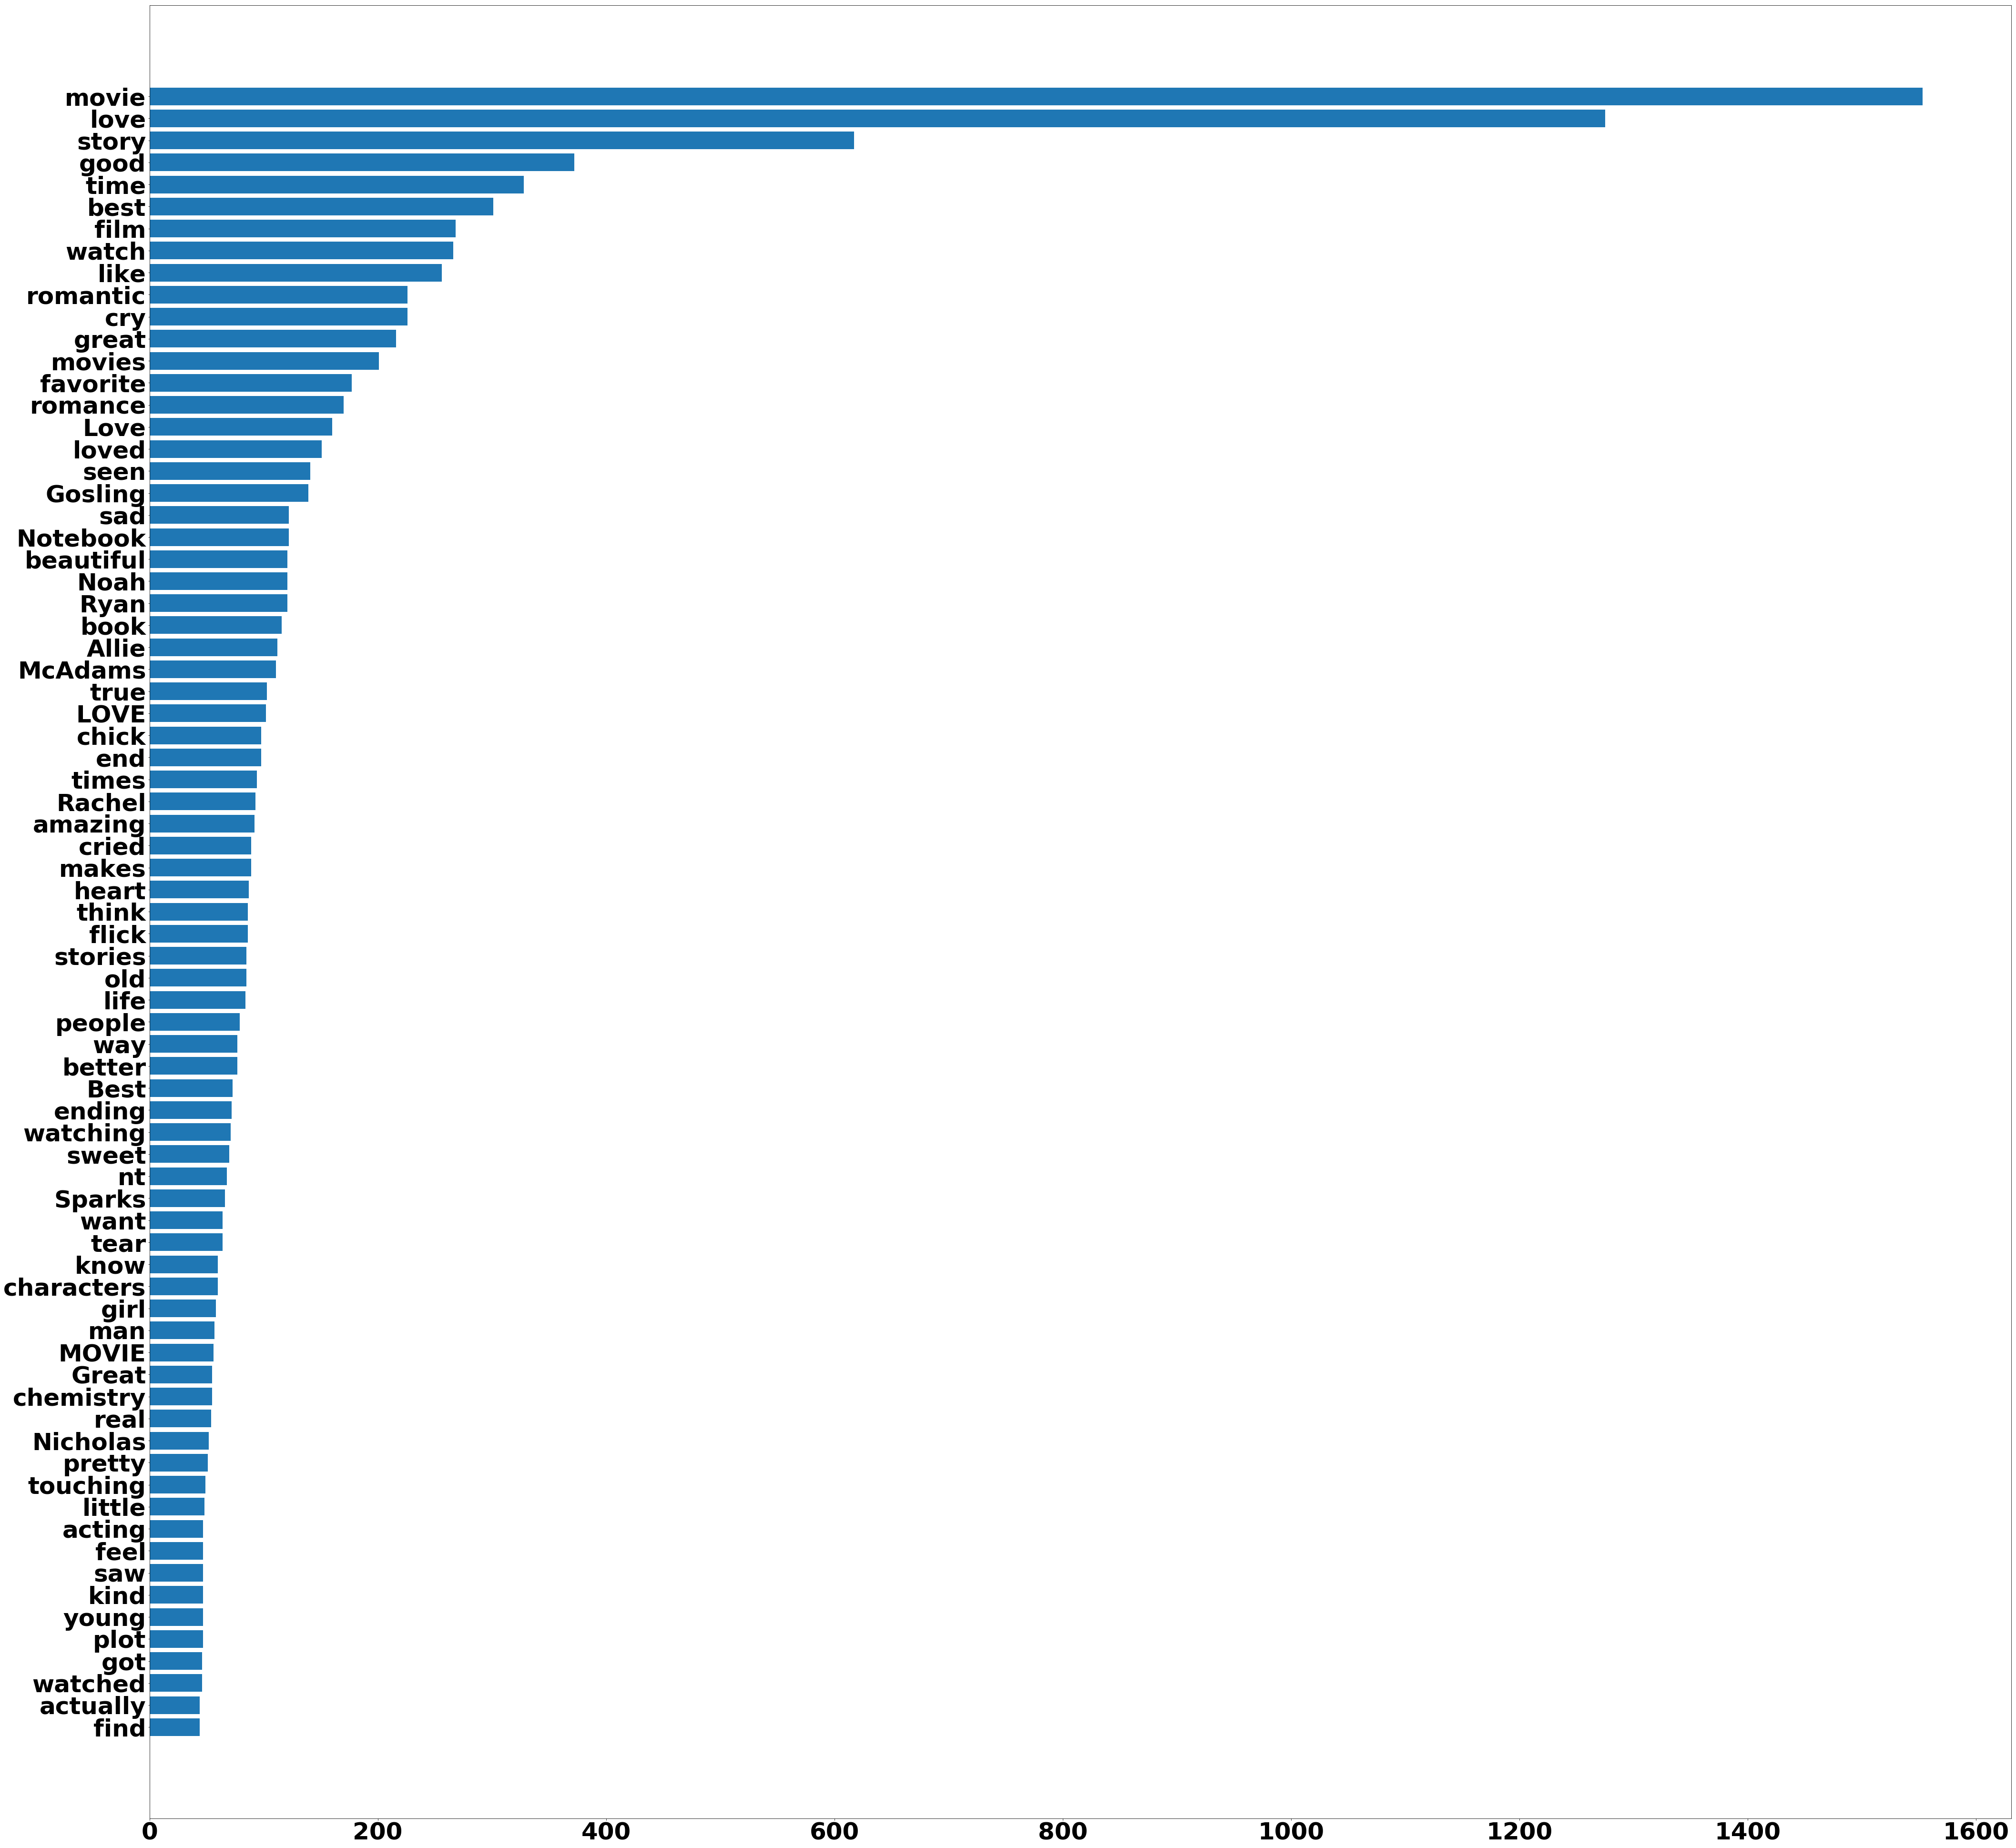

In [234]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 50}

plt.rc('font', **font)
fig = plt.figure(figsize=(70,70))
plt.barh(values[:75], counts[:75])
plt.gca().invert_yaxis()
plt.show()

_Observation_
- Word Movie is in top, not surprising since this reviews is about movie
- Love is the second top word, so more positive reviews are there

## N Gram

In [275]:
import nltk

In [276]:
type(all_values)
print((all_values)[5])
print(len(all_values))

a
5933


In [282]:
ngram_tmp = 0

for ngram in nltk.ngrams(all_values, 2):
    print(ngram,)
    ngram_tmp += 1
print(ngram_tmp)

('the', 'movie')
('movie', 'I')
('I', 'and')
('and', 'it')
('it', 'a')
('a', 'love')
('love', 'of')
('of', 'this')
('this', 'to')
('to', 'is')
('is', 'that')
('that', 'story')
('story', 'in')
('in', 'but')
('but', 'was')
('was', 'my')
('my', "'s")
("'s", 'i')
('i', 'you')
('you', 'The')
('The', 'good')
('good', 'me')
('me', 'for')
('for', 'with')
('with', 'one')
('one', 'time')
('time', 'all')
('all', "n't")
("n't", 'ever')
('ever', 'best')
('best', 'have')
('have', 'so')
('so', 'film')
('film', 'This')
('This', 'watch')
('watch', 'It')
('It', 'like')
('like', 'not')
('not', 'romantic')
('romantic', 'cry')
('cry', 'as')
('as', 'be')
('be', 'great')
('great', 'movies')
('movies', 'really')
('really', 'on')
('on', 'do')
('do', 'favorite')
('favorite', 'just')
('just', 'romance')
('romance', 'very')
('very', 'A')
('A', 'at')
('at', 'Love')
('Love', 'are')
('are', 'its')
('its', 'loved')
('loved', 'much')
('much', 'from')
('from', 'over')
('over', 'see')
('see', 'they')
('they', 'can')
('c

('fact', 'storyline')
('storyline', "'d")
("'d", 'understand')
('understand', 'He')
('He', 'probably')
('probably', 'OF')
('OF', 'When')
('When', 'trying')
('trying', 'named')
('named', 'went')
('went', 'mother')
('mother', 'coming')
('coming', 'mind')
('mind', 'que')
('que', 'sooo')
('sooo', 'heartwarming')
('heartwarming', 'maybe')
('maybe', 'women')
('women', 'finally')
('finally', 'face')
('face', 'family')
('family', 'Romance')
('Romance', 'Ever')
('Ever', 'la')
('la', 'simple')
('simple', 'single')
('single', 'especially')
('especially', 'based')
('based', 'job')
('job', 'moving')
('moving', 'na')
('na', 'happen')
('happen', 'feeling')
('feeling', 'having')
('having', 'played')
('played', 'favourite')
('favourite', 'books')
('books', 'sucker')
('sucker', 'yes')
('yes', 'gon')
('gon', 'course')
('course', 'house')
('house', 'MY')
('MY', 'nothing')
('nothing', 'die')
('die', 'perfectly')
('perfectly', 'might')
('might', 'although')
('although', 'decent')
('decent', 'telling')
('tel

('themselves', 'act')
('act', 'review')
('review', 'dialogue')
('dialogue', 'formula')
('formula', 'taking')
('taking', 'strong')
('strong', 'idea')
('idea', 'stunning')
('stunning', 'four')
('four', 'deep')
('deep', 'Despite')
('Despite', 'Watched')
('Watched', 'True')
('True', 'meet')
('meet', 'piece')
('piece', 'Too')
('Too', 'depth')
('depth', 'viewing')
('viewing', 'wait')
('wait', 'Sad')
('Sad', 'nicholas')
('nicholas', 'picture')
('picture', 'created')
('created', 'Read')
('Read', 'near')
('near', 'YOU')
('YOU', 'Remember')
('Remember', 'By')
('By', 'Everyone')
('Everyone', 'Wonderful')
('Wonderful', 'Then')
('Then', 'music')
('music', 'taste')
('taste', 'Day')
('Day', 'Sappy')
('Sappy', 'deserves')
('deserves', 'war')
('war', 'Thanks')
('Thanks', 'touched')
('touched', 'First')
('First', 'Allen')
('Allen', 'turns')
('turns', 'portrayed')
('portrayed', 'brain')
('brain', 'writer')
('writer', 'stand')
('stand', 'annoying')
('annoying', 'After')
('After', 'His')
('His', 'masterpie

('predictability', 'worthy')
('worthy', 'obsessed')
('obsessed', 'Mcadams')
('Mcadams', 'Alzheimer')
('Alzheimer', 'sucks')
('sucks', 'behind')
('behind', 'married')
('married', 'yea')
('yea', 'obvious')
('obvious', 'suppose')
('suppose', 'AT')
('AT', 'Sometimes')
('Sometimes', '1940s')
('1940s', 'backed')
('backed', 'favorita')
('favorita', 'fans')
('fans', 'fantasy')
('fantasy', 'heartbreak')
('heartbreak', 'indeed')
('indeed', 'MUCH')
('MUCH', 'fashion')
('fashion', 'fast')
('fast', 'situation')
('situation', "'S")
("'S", 'Spark')
('Spark', 'pick')
('pick', 'fails')
('fails', 'balled')
('balled', 'factor')
('factor', 'ing')
('ing', 'beat')
('beat', 'author')
('author', 'poignant')
('poignant', 'plus')
('plus', 'muy')
('muy', 'expected')
('expected', 'experienced')
('experienced', 'explain')
('explain', 'hell')
('hell', 'pleasant')
('pleasant', 'tragedy')
('tragedy', 'plain')
('plain', 'places')
('places', 'magical')
('magical', 'yeah')
('yeah', 'Time')
('Time', 'southern')
('souther

('resonant', 'resonance')
('resonance', 'game')
('game', 'gain')
('gain', 'York')
('York', 'crawl')
('crawl', 'huh')
('huh', 'stared')
('stared', 'creative')
('creative', 'Enjoyable')
('Enjoyable', 'credit')
('credit', 'credits')
('credits', 'acceptable')
('acceptable', 'crier')
('crier', 'likeable')
('likeable', 'fully')
('fully', 'criteria')
('criteria', 'pace')
('pace', 'staple')
('staple', 'EPIC')
('EPIC', 'visit')
('visit', 'released')
('released', 'vow')
('vow', 'stone')
('stone', 'defy')
('defy', 'q')
('q', 'newspaper')
('newspaper', 'del')
('del', 'intelligent')
('intelligent', 'delicious')
('delicious', 'stood')
('stood', 'para')
('para', 'delivering')
('delivering', 'Whether')
('Whether', 'definition')
('definition', 'Whenever')
('Whenever', 'demented')
('demented', 'reccomend')
('reccomend', 'rebuilt')
('rebuilt', 'forgetting')
('forgetting', 'insurance')
('insurance', 'realy')
('realy', 'depicted')
('depicted', 'depicting')
('depicting', 'tend')
('tend', 'depressed')
('depr

('masses', 'much<3')
('much<3', 'mill')
('mill', 'patchy')
('patchy', 'nieces')
('nieces', 'noah.in')
('noah.in', 'noticed')
('noticed', 'passing')
('passing', 'odd')
('odd', 'optional')
('optional', 'painfully')
('painfully', 'odiosa')
('odiosa', 'perform')
('perform', 'necessarily')
('necessarily', 'mimic')
('mimic', 'necessary')
('necessary', 'mubbling')
('mubbling', 'movie.in')
('movie.in', 'newer')
('newer', 'overhead')
('overhead', 'mentality')
('mentality', 'passionately')
('passionately', 'muuah')
('muuah', 'moms')
('moms', 'mundane')
('mundane', 'milked')
('milked', 'noises')
('noises', 'niche')
('niche', 'needing')
('needing', 'old=')
('old=', 'palpable')
('palpable', 'nicely')
('nicely', 'monotone')
('monotone', 'murdered')
('murdered', 'master')
('master', 'normal')
('normal', 'overdose')
('overdose', 'panties')
('panties', 'miles')
('miles', 'percent')
('percent', 'neva')
('neva', 'mesmerizing')
('mesmerizing', 'omgg')
('omgg', 'masterfully')
('masterfully', 'offputting')


('qonderful', "qu'il")
("qu'il", "qu'on")
("qu'on", 'quand')
('quand', 'quanie')
('quanie', 'quant')
('quant', 'quarter')
('quarter', 'quatre')
('quatre', 'quem')
('quem', 'quest')
('quest', 'putn')
('putn', 'pretens√µes')
('pretens√µes', 'proverb')
('proverb', 'prosperous')
('prosperous', 'prevented')
('prevented', 'prevents')
('prevents', 'prim')
('prim', 'primarily')
('primarily', 'prime')
('prime', 'prince')
('prince', 'prior')
('prior', 'pristine')
('pristine', 'pritty')
('pritty', 'proceeds')
('proceeds', 'process')
('process', 'processing')
('processing', 'proved')
('proved', 'produced')
('produced', 'profunda')
('profunda', 'profundity')
('profundity', 'project')
('project', 'projectile')
('projectile', 'projects')
('projects', 'prolonged')
('prolonged', 'prom')
('prom', 'promised')
('promised', 'pronto')
('pronto', 'properly')
('properly', 'prop√µe')
('prop√µe', 'prospect')
('prospect', 'produ√É¬ß√É¬£o')
('produ√É¬ß√É¬£o', 'rock')
('rock', 'rocks')
('rocks', 'rolling')
('rolli

('bookended', 'boohoo')
('boohoo', 'bestrew')
('bestrew', 'bestseller')
('bestseller', 'bestselling')
('bestselling', 'beware')
('beware', 'bias')
('bias', 'biggest')
('biggest', 'billion')
('billion', 'binders')
('binders', 'birthday')
('birthday', 'bitter')
('bitter', 'blah')
('blah', 'blanket')
('blanket', 'bleh')
('bleh', 'blend')
('blend', 'blessed')
('blessed', 'blessing')
('blessing', 'blev')
('blev', 'boo')
('boo', 'bonita')
('bonita', 'bone')('CALL', 'CAN')
('CAN', 'CANNOT')
('CANNOT', 'CAUGHT')
('CAUGHT', 'CERTAIN')
('CERTAIN', 'CG')
('CG', 'CHICK')
('CHICK', 'CLASIC')
('CLASIC', 'COMMITMENT')
('COMMITMENT', 'Cinematography')
('Cinematography', 'CRAZY')
('CRAZY', 'CRITIC')
('CRITIC', 'CRYED')
('CRYED', 'CUTE')
('CUTE', 'Canada')
('Canada', 'Canadians')
('Canadians', 'Captivating')
('Captivating', 'Casablanca')
('Casablanca', 'Cassevetes')
('Cassevetes', 'Character')
('Character', 'Charles')
('Charles', 'Charleston')
('Charleston', 'Charlie')
('Charlie', 'Charming')
('Charming

('fierce', 'fiery')
('fiery', 'fifth')
('fifth', 'fighting')
('fighting', 'filck')
('filck', 'fazer')
('fazer', 'fill')
('fill', 'filmes')
('filmes', 'filmmakers')
('filmmakers', 'finale')
('finale', 'financially')
('financially', 'finatics')
('finatics', 'finest')
('finest', 'firmly')
('firmly', 'fits')
('fits', 'fitted')
('fitted', 'flames')
('flames', 'flash')
('flash', 'flavor')
('flavor', 'flawless')
('flawless', 'fleeting')
('fleeting', 'filmas')
('filmas', 'fleshed')
('fleshed', 'faz')
('faz', 'favorited')
('favorited', 'exude')
('exude', 'exudes')
('exudes', 'eyed')
('eyed', 'eyes|')
('eyes|', 'fabulous')
('fabulous', 'fail')
('fail', 'failing')
('failing', 'fairytail')
('fairytail', 'fait')
('fait', 'fake')
('fake', 'false')
('false', 'fanbase')
('fanbase', 'fangirls')
('fangirls', 'fantasies')
('fantasies', 'favorte')
('favorte', 'fantasize')
('fantasize', 'farce')
('farce', 'fare')
('fare', 'farm')
('farm', 'farmer')
('farmer', 'fascinated')
('fascinated', 'faster')
('faster

('endlessly', 'enforce')
('enforce', 'engagement')
('engagement', 'engages')
('engages', 'engross')
('engross', 'enjoyably')
('enjoyably', 'enjoying')
('enjoying', 'ensue')
('ensue', 'ensues')
('ensues', 'enternaining')
('enternaining', 'entertainment')
('entertainment', 'encrusted')
('encrusted', 'enthralled')
('enthralled', 'elenco')
('elenco', 'electric')
('electric', 'drips')
('drips', 'drivel')
('drivel', 'drizzled')
('drizzled', 'drom')
('drom', 'drowned')
('drowned', 'drowns')
('drowns', 'dry')
('dry', 'duck')
('duck', 'ducks')
('ducks', 'duh')
('duh', 'duper')
('duper', 'dust')
('dust', 'd√©grader')
('d√©grader', 'd√©j√†')
('d√©j√†', 'electrify')
('electrify', 'eachothers')
('eachothers', 'easygoing')
('easygoing', 'eat')
('eat', 'eclipsed')
('eclipsed', 'edge')
('edge', 'edible')
('edible', 'edited')
('edited', 'editing')
('editing', 'editor')
('editor', 'effectiveness')
('effectiveness', 'efficient')
('efficient', 'efforts')


__Getting most frequency ngrams__

In [283]:
ngram_freq = nltk.FreqDist() # INITIALIZED A FREQUENCY COUNTER

for ngram in nltk.ngrams(all_values, 2):
    ngram_freq[ngram] += 1
ngram_freq.most_common(50)

[(('the', 'movie'), 1),
 (('movie', 'I'), 1),
 (('I', 'and'), 1),
 (('and', 'it'), 1),
 (('it', 'a'), 1),
 (('a', 'love'), 1),
 (('love', 'of'), 1),
 (('of', 'this'), 1),
 (('this', 'to'), 1),
 (('to', 'is'), 1),
 (('is', 'that'), 1),
 (('that', 'story'), 1),
 (('story', 'in'), 1),
 (('in', 'but'), 1),
 (('but', 'was'), 1),
 (('was', 'my'), 1),
 (('my', "'s"), 1),
 (("'s", 'i'), 1),
 (('i', 'you'), 1),
 (('you', 'The'), 1),
 (('The', 'good'), 1),
 (('good', 'me'), 1),
 (('me', 'for'), 1),
 (('for', 'with'), 1),
 (('with', 'one'), 1),
 (('one', 'time'), 1),
 (('time', 'all'), 1),
 (('all', "n't"), 1),
 (("n't", 'ever'), 1),
 (('ever', 'best'), 1),
 (('best', 'have'), 1),
 (('have', 'so'), 1),
 (('so', 'film'), 1),
 (('film', 'This'), 1),
 (('This', 'watch'), 1),
 (('watch', 'It'), 1),
 (('It', 'like'), 1),
 (('like', 'not'), 1),
 (('not', 'romantic'), 1),
 (('romantic', 'cry'), 1),
 (('cry', 'as'), 1),
 (('as', 'be'), 1),
 (('be', 'great'), 1),
 (('great', 'movies'), 1),
 (('movies', 'r

_Observation_
- There is no more frequent combinations occured

In [105]:
## combine all the tokens back to form a string

data['clean_text_stemmed'] = [' '.join(text) for text in data['clean_text_stemmed']]
data['clean_text_lemmatized'] = [' '.join(text) for text in data['clean_text_lemmatized']]

## Train-Test Split

In [106]:
from sklearn.model_selection import train_test_split

In [108]:
df['Sentiment'] = df['Rating'].apply(lambda x: 1 if x <= 3 else 0)

In [109]:
x_train, x_val, y_train, y_val = train_test_split(data['clean_text_stemmed'], df['Sentiment'],test_size=0.20,random_state=646) 

## TF-IDF

### Word to vector by TFIdf

In [111]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [112]:
#define tf-idf object
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, max_features=20000,
                                 min_df=0.2,
                                 use_idf=True, ngram_range=(1,4))

#tfidf_vectorizer.fit(data['clean_text_lemmatized'])
tfidf_vectorizer.fit(x_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.9, max_features=20000, min_df=0.2,
        ngram_range=(1, 4), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [113]:
tfidf_matrix = tfidf_vectorizer.transform(x_train)

#### Getting TfIDF vector for validation data

In [114]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, max_features=20000,
                                 min_df=0.2,
                                 use_idf=True, ngram_range=(1,4))


tfidf_vectorizer.fit(x_val)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.9, max_features=20000, min_df=0.2,
        ngram_range=(1, 4), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [115]:
val_tfidf_matrix = tfidf_vectorizer.transform(x_val)

In [116]:
from sklearn.linear_model import LogisticRegression

In [117]:
x_train_tfidf = tfidf_matrix

In [118]:
#creating Validation tfidf matrix object 
x_val_tfidf = val_tfidf_matrix

### Word to vector by countvectorizer

In [139]:
#Impoting countvectorizer library
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer

cv=CountVectorizer(stop_words='english',lowercase=True,strip_accents='unicode',decode_error='ignore')


In [141]:
#Fit and transform the countvectorizer object on data
cv.fit(x_train)

CountVectorizer(analyzer='word', binary=False, decode_error='ignore',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents='unicode', token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [142]:
train_cv_matrix = cv.transform(x_train)

In [143]:
x_trainvec = train_cv_matrix

In [144]:
#Fitting model to train data
model2.fit(x_trainvec,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [145]:
#Transform the model to train data to get prediction
train_pred_vec = model2.predict(x_trainvec)

#### Creating countervector for validation data

In [123]:
cv.fit(x_val)

CountVectorizer(analyzer='word', binary=False, decode_error='ignore',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents='unicode', token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [124]:
# Creating validation cv matrix
val_cv_matrix = cv.transform(x_val)

In [125]:
# Creating validation cv object
x_val_cv_vec = val_cv_matrix

# Building Models

### Logistic Regression

In [126]:
tfidf_log = LogisticRegression()

In [127]:
#Fitting model on train data
tfidf_log.fit(x_train_tfidf,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [128]:
#Fitting model to validation data
tfidf_log.fit(x_val_tfidf,y_val)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [129]:
#Getting training prediction
train_pred_tfidf = tfidf_log.predict(x_train_tfidf)

In [130]:
#Getting training prediction
train_pred_tfidf = tfidf_log.predict(x_train_tfidf)

In [131]:
from sklearn.metrics import confusion_matrix, f1_score

In [132]:
# Getting model score and confusion matrix

print ("The Logistic regression model score using tfidf vector medthod is: ", tfidf_log.score(x_train_tfidf, y_train))
print(confusion_matrix(y_true=y_train, y_pred = train_pred_tfidf))


The Logistic regression model score using tfidf vector medthod is:  0.8475
[[2034    0]
 [ 366    0]]


In [133]:
#Getting f1 score for training data
f1_score(y_train,train_pred_tfidf)

0.0

__Building logistic model by using CV vector__

In [173]:
#Creating model2(logreg) object
model2 = LogisticRegression()

In [174]:
#Fitting model to train data
model2.fit(x_trainvec,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [175]:
#Transform the model to train data to get prediction
train_pred_vec = model2.predict(x_trainvec)

In [155]:
print ("The Logistic regression model score is: ", model2.score(x_trainvec, y_train))
print(confusion_matrix(y_true=y_train, y_pred = train_pred_vec))

The Logistic regression model score is:  0.9433333333333334
[[2031    3]
 [ 133  233]]


In [156]:
f1_score(y_train,train_pred_vec)

0.7740863787375416

#### Logistic(CV) for validation

In [157]:
#Fitting model2 on validation data
model2.fit(x_val_cv_vec, y_val)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [158]:
#predicting the model on validation data to get prediction
val_pred_vec = model2.predict(x_val_cv_vec)

In [159]:
print ("The Logistic regression model score is: ", model2.score(x_val_cv_vec, y_val))
print(confusion_matrix(y_true=y_val, y_pred = val_pred_vec))

The Logistic regression model score is:  0.9333333333333333
[[500   0]
 [ 40  60]]


In [160]:
f1_score(val_pred_vec, y_val)

0.7499999999999999

_Since the f1 score for logistic model using countvectorizer is high,  fit that model to unseen data_

### Preprocessing for Unseen test data

In [161]:
#Reading test data
liontest_data = pd.read_csv('test-1566619745327.csv', header=0 )

In [163]:
liontest_data.isnull().sum()

ReviewID    0
Review      0
dtype: int64

In [164]:
liontest_data.shape

(1200, 2)

In [165]:
liontest_data.head()

ReviewID                                             Review
0     92876  Was good. Nothing like the original but I beli...
1     92877  I absolutely loved it! A wonderful rendition o...
2     92878  I love the movie! Good job director! \nI appre...
3     92879  GREAT MOVIE!!  Same as the original, but the c...
4     92880             Realistic.   Fantastic special effects

In [162]:
#Changing name of test dataframe and converting dataframe to dict

liontest_data.rename(columns={'review':'Review'},inplace='True')
test_data = liontest_data.reset_index().to_dict(orient='list')

In [166]:
test_data['Review'] = [text.strip().lower() for text in test_data['Review']]
test_data['Review'] = [expand_contractions(re.sub('‚Äô', "'", text)) for text in test_data['Review']]

The expand match is <function expand_contractions.<locals>.expand_match at 0x000000001DF93EA0> and text is was good. nothing like the original but i believe that was the point.
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000001DF93EA0> and text is i absolutely loved it! a wonderful rendition of the original. just dont compare to the cartoon version. let this movie be its own and you will like it
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000001DF93EA0> and text is i love the movie! good job director! 
i appreciate all the work some great people have put in for years.
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000001DF93EA0> and text is great movie!!  same as the original, but the cinematography made a huge difference!!
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000001DF93EA0> and text is realistic.   fantastic special effects
The expand matc

The expand match is <function expand_contractions.<locals>.expand_match at 0x000000001DF93EA0> and text is loved the movie. looks so real and well done.
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000001DF93EA0> and text is the graphics were really beautiful. the new original music was outstanding. of course the elton john, circle of life is always beautiful.
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000001DF93EA0> and text is love it, it s amazing,  hilarious
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000001DF93EA0> and text is incredible. no idea what the critics are talking about.
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000001DF93EA0> and text is i dislike beyonc being nala her voice didnt go good with that character
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000001DF93EA0> and text is they took ou

The expand match is <function expand_contractions.<locals>.expand_match at 0x000000001DF93EA0> and text is just like the original, but worse. it feels soulless and the voice acting is weak, especially by comparison to what came before. the effects are amazing (and probably will be for the next two years), but the 'photo realism' means that there is zero emotion to be found in the visuals - it's all in the amazing soundtrack. honestly, i'd rather watch this movie with the dialogue cut out, like a dramatised david attenborough documentary.
<re.Match object; span=(286, 290), match="it's">
<class 're.Match'>
it's
i
<re.Match object; span=(332, 335), match="i'd">
<class 're.Match'>
i'd
i
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000001DF93EA0> and text is great movie! loved the reality of the movie.
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000001DF93EA0> and text is watched both ways now and its definitely worth wa

The expand match is <function expand_contractions.<locals>.expand_match at 0x000000001DF93EA0> and text is this was a childhood favorite of our daughter.  july 20th she turned twenty and this was my birthday present to her.  we loved it!!
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000001DF93EA0> and text is exactly the same as the original‚Ä¶ exactly the same
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000001DF93EA0> and text is i loved it!!!! is a must see movie.
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000001DF93EA0> and text is such a magnificent remake!!!! true to the original plus some added humor!
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000001DF93EA0> and text is the movie was great  i loved it it's great for all ages  male and female i highly recommend it to everyone thanks for a great movie
<re.Match object; span=(32, 36), match

and yes, the lion king was so good that i would like to see a remake of simba's pride.
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000001DF93EA0> and text is timon and pumba were more cynical and obnoxious than in the original and were almost unlikable.  disney keeps trying to push the envelope with their kids movies which i do not appreciate.  as with almost all of these remakes, the original is much better!
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000001DF93EA0> and text is the original was better in my opinion. i actually fell asleep a couple of times.
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000001DF93EA0> and text is imax works great for this movie, beautiful details takes you close to the nature. kids and adults will enjoy alike
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000001DF93EA0> and text is really good movie so much like the

The expand match is <function expand_contractions.<locals>.expand_match at 0x000000001DF93EA0> and text is i hated that they tried so hard to be different from the original yet filmed scene by scene like the original!!! their idea of changing it up was changing little words that had me say why not just use the actual script ? i know lion king scene by scene word by word ... for example the scene after mufasa saved simba from the hyenas , in the original mufasa tells zazu to "take nala home" but in the remake he says " take nala back to pride rock." why !!!! it was alot of that throughout the movie that i found pointless... if it's that important that you have to scramble a few words why do the entire movie 90% like the original!!! i would have respected it more if it was exactly like the 1994 film , script and all. that would have been suitable because everything else set aside i enjoyed seeing actual animals re-enact. it would have just given another perspective of a classic. scene by

The expand match is <function expand_contractions.<locals>.expand_match at 0x000000001DF93EA0> and text is fantastc. best disney i've ever seen
<re.Match object; span=(22, 26), match="i've">
<class 're.Match'>
i've
i
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000001DF93EA0> and text is it was a fantastic remake. the graphics and animations was a+
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000001DF93EA0> and text is the new lion king is amazing! i am a lover of all things disney.  i loved the 1994 lion king and love the new lion king.   

the imagery was stunning!  absolutely breathtaking!  the backstory in the new lion king adds more vivid imagery and explanation.   i was happy to see disney did not stray from the powerful beginning and ending.  adding the lionesses at the end to fight with simba, along with the explanation cerabe states to scar, is a wonderful addition!  

way to go disney!  a must see for anyon

this is a must see for children and adults
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000001DF93EA0> and text is this was an amazing movie the reenacting was on point
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000001DF93EA0> and text is such a wonderful rendition! enjoyed it so much critics are stupid! saw imax 3d
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000001DF93EA0> and text is my daughters ( ages 6 and 3) have been impatiently waiting to see this movie and let me tell you it was amazing! the girls loved it and can't wait for it to come out on dvd. definite must see!
<re.Match object; span=(136, 141), match="can't">
<class 're.Match'>
can't
c
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000001DF93EA0> and text is cinematography was unbeleivable!
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000001DF93EA0

The expand match is <function expand_contractions.<locals>.expand_match at 0x000000001DF93EA0> and text is it was a very great film tbh with you. the only negatives i have is the lack of compassion of several scenes but they're being realistic about what animals can and cannot do just like the original classic film. i'm very quite impressed of the singing scenes. it's almost exactly like film except the passion & facial expressions that's all. very fun & happy film for all ages. i really enjoyed it including my family. i hope y'all enjoy it as well.
<re.Match object; span=(113, 120), match="they're">
<class 're.Match'>
they're
t
<re.Match object; span=(211, 214), match="i'm">
<class 're.Match'>
i'm
i
<re.Match object; span=(259, 263), match="it's">
<class 're.Match'>
it's
i
<re.Match object; span=(329, 335), match="that's">
<class 're.Match'>
that's
t
<re.Match object; span=(425, 430), match="y'all">
<class 're.Match'>
y'all
y
The expand match is <function expand_contractions.<locals>.

<re.Match object; span=(241, 245), match="it's">
<class 're.Match'>
it's
i
<re.Match object; span=(548, 552), match="it's">
<class 're.Match'>
it's
i
<re.Match object; span=(570, 577), match="haven't">
<class 're.Match'>
haven't
h
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000001DF93EA0> and text is exactly what i was hoping for and better...  i am sorry the critics continue to be way off in their understanding of quality movies
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000001DF93EA0> and text is loved the movie not a fan of beyonc√© however
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000001DF93EA0> and text is i was hoping this version would be different than the animated lion king, so i was a bit disappointed. the rest of my family raved about how great this movie was, however, so i defer to their sentiments in my rating. my favorite scene involved new content, so i won't sp

you know what? i'm taking back half a star
<re.Match object; span=(83, 87), match="i've">
<class 're.Match'>
i've
i
<re.Match object; span=(274, 277), match="i'm">
<class 're.Match'>
i'm
i
<re.Match object; span=(414, 419), match="she's">
<class 're.Match'>
she's
s
<re.Match object; span=(448, 456), match="couldn't">
<class 're.Match'>
couldn't
c
<re.Match object; span=(892, 895), match="i'm">
<class 're.Match'>
i'm
i
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000001DF93EA0> and text is kids really enjoyed it and as an adult now 20+ years later...it still made me sad when mufasa died.
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000001DF93EA0> and text is i love having it come to life with real animals. the music was real special and up lifting.
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000001DF93EA0> and text is loved the film. i cried, and laughed.
The expand match is <functi

The expand match is <function expand_contractions.<locals>.expand_match at 0x000000001DF93EA0> and text is the original animated film holds a special place in my heart and mind but i thoroughly enjoyed what director jon favreau and co. have delivered. despite being nearly a shot-for-shot remake (in terms of plot) with some special changes here and there, i felt the same bit of joy, sadness, suspense and happiness all over again maybe even more so with it being "live-action." i do wish there was more distinction in appearance between some characters of the same species like the hyenas and female lions. for instance, i couldn't tell nala and sarabi apart in scenes they share unless they weren't speaking. however, with movie being a photorealistic reimagining of the animation, the identical-ness makes sense given the same would apply for the real wildlife. as for the film's soundtrack, the voice cast, which consists of global recording artists, deliver worthy new renditions of the classic

<class 're.Match'>
weren't
w
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000001DF93EA0> and text is loved he scenes of africa.
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000001DF93EA0> and text is awesome job on remaking this. stayed true to the original!
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000001DF93EA0> and text is it's the lion king. the same story you remember when you were a kid. no new take or reimagining as far as that goes. imagine the lion king meets animal planet and you pretty much get it. however, the photo-realism takes away from some of the magic of the original film. there were aspects of the story telling mechanics that just felt more impactful as they were depicted in the original that just sort of lost their emotional effect in this ‚Äúretelling‚Äù of the tale. the graphic design is breathtaking but i think the original was much more enjoyable. i hear s

The expand match is <function expand_contractions.<locals>.expand_match at 0x000000001DF93EA0> and text is ac was broken in the theater, had to wait an hour for another movie and seats were lost
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000001DF93EA0> and text is it was great. both my wife and i loved it and we love the animated version as well. very well crafted and beautiful to look at. of course, i understand those that are comparing every moment but just relax and enjoy. technically a marvel!
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000001DF93EA0> and text is it was good, obviously because lion king was amazing, but it was just the lion king from 1994 with a better picture. it was very emotionless and mono tone. pumbaa and timon were hilarious though.
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000001DF93EA0> and text is great movie, amazing effects, brings back memories

The expand match is <function expand_contractions.<locals>.expand_match at 0x000000001DF93EA0> and text is the movie was exceptional!! the best disney remake to date. brought me laughs and tears all while paying the utmost respect to the original. this movie give me a hope for more live action remakes by disney. this movie proves that you shouldn't always trust what the critical say. if you liked the original, then you will fall in love with this
<re.Match object; span=(234, 243), match="shouldn't">
<class 're.Match'>
shouldn't
s
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000001DF93EA0> and text is very good!! timon and pumba absolutely makes it! did 4 stars only because you can't beat the original!
<re.Match object; span=(78, 83), match="can't">
<class 're.Match'>
can't
c
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000001DF93EA0> and text is excellent! visually breathtaking!!!
The expand match is <function expand

The expand match is <function expand_contractions.<locals>.expand_match at 0x000000001DF93EA0> and text is great movie! real world graphics were amazing
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000001DF93EA0> and text is awesome! go see it yourself, don't listen to the critics or the tomatoes.  some tomato throwers may have not liked how the laws of this jungle hit home.
<re.Match object; span=(29, 34), match="don't">
<class 're.Match'>
don't
d
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000001DF93EA0> and text is it was amazing, i loved it and still loving it. thanks
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000001DF93EA0> and text is i really enjoyed! it took a moment to get used to the "realness" of the movie, but ocer all it was great!. my son and i enjoyed the songs and added funny moments.
The expand match is <function expand_contractions.<locals>.expand_match at 0x000

The expand match is <function expand_contractions.<locals>.expand_match at 0x000000001DF93EA0> and text is great! young simba was sangin! adult simba was sangin too!!! james earl jones at 88, i am just amazed! still great! the graphics were wonderful! it looked so real! i love the original story line but also love the freshness of the added details! timon and pumba...still stars! beyonc√© you were singing gal! my family thoroughly enjoyed this film! i love the original and i love this one too! kudos!
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000001DF93EA0> and text is i loved it make a #2 please!!!!!
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000001DF93EA0> and text is loved everything about this movie!
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000001DF93EA0> and text is the realistic look to all the animals was amazing, every detail seemed legit not just the main characters

The expand match is <function expand_contractions.<locals>.expand_match at 0x000000001DF93EA0> and text is i loved this film! i took me back as if i were watching it for the first time as a child  . i will definitely be seeing it again.
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000001DF93EA0> and text is true to the original. it was like being a little kid again
The expand match is <function expand_contractions.<locals>.expand_match at 0x000000001DF93EA0> and text is we simply didn't need this movie to be remade, especially when it lacks all of the unique personality and emotional weight behind the character's facial expressions that made the original so fun to watch. instead what we're left with is a lifelike vapid doppelganger that's clearly just a shameless cash grab.
<re.Match object; span=(10, 16), match="didn't">
<class 're.Match'>
didn't
d
<re.Match object; span=(218, 223), match="we're">
<class 're.Match'>
we're
w
<re.Match object; span=(26

The expand match is <function expand_contractions.<locals>.expand_match at 0x000000001DF93EA0> and text is as an avid fan of the original, i waited in anticipation for this movie for months. cgi was well done. but everything else was a disappointment. i suppose when something is perfect as is (the original), it shouldn't be toyed with. the voices were just not as endearing and the overall emotin just wasnt there.
<re.Match object; span=(206, 215), match="shouldn't">
<class 're.Match'>
shouldn't
s


In [167]:
# Removing unwanted characters

def clean_words(text):
    text = re.sub("(\\W|\\d)",' ',text)
    return text

### Calling the defined function
test_data['Review'] = [clean_words(text) for text in test_data['Review']]

In [168]:
test_data['clean_text_stemmed'] = []
test_data['clean_text_lemmatized'] = []
test_data['text_stemmed'] = []
test_data['text_lemmatized'] = []

for idx,text in enumerate(test_data['Review']):

    doc = nlp(text)
    testwords_stemmed = tokenize_and_stem(doc)
    testwords_lemmatized = tokenize_and_lemmatize(doc)
   #vocab_stemmed.extend(words_stemmed)
   # vocab_lemmatized.extend(words_lemmatized)
    
    test_data['clean_text_stemmed'].append(testwords_stemmed)
    test_data['clean_text_lemmatized'].append(testwords_lemmatized)


In [169]:
test_data['clean_text_lemmatized'] = [' '.join(text) for text in test_data['clean_text_lemmatized']]

In [171]:
test_cv_matrix = cv.transform(test_data['clean_text_lemmatized'])

In [176]:
test_cv_pred = model2.predict(test_cv_matrix)

In [177]:
test_cv_pred = model2.predict(test_cv_matrix)

In [178]:
testdf = pd.DataFrame(test_cv_pred)

In [179]:
testdf['ReviewID']= liontest_data.ReviewID

In [180]:
#Exporting predicted excel sheet

testdf.to_csv("Final_testresults.csv", index=True)

### Model3-DecisionTree

In [181]:
#Importing library
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

_DT Traing data_

In [193]:
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0) #Euclidean distance
classifier

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [194]:
#Fitting decision tree model on train data
classifier.fit(x_trainvec, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [195]:
#Transform the model to train data to get prediction
DTree_train_pred = classifier.predict(x_trainvec)

In [185]:
DT_CMtrain = confusion_matrix(y_train, DTree_train_pred)
print(DT_CMtrain)

[[2034    0]
 [  12  354]]


In [186]:
#f1_score of training data
f1_score(y_train,DTree_train_pred)

0.9833333333333333

_DT on validation data_

In [188]:
classifier.fit(x_val_cv_vec, y_val)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [189]:
#Transform the model to validation data to get prediction
DTree_val_pred = classifier.predict(x_val_cv_vec)

In [191]:
#f1_score of validation data
f1_score(y_val,DTree_val_pred)

1.0

_DT on test data_

In [196]:
test_DT_pred = classifier.predict(test_cv_matrix)

In [198]:
testdf_DT = pd.DataFrame(test_DT_pred) 

In [199]:
testdf_DT['ReviewID']= liontest_data.ReviewID

In [200]:
test_DT_pred.shape

(1200,)

In [201]:
testdf_DT.to_csv("DT_testresults.csv", index=True)

## Word Embeeding

### Get the unique count of Review text length 

In [202]:
df.columns

Index(['Unnamed: 0', 'UsedID', 'UserName', 'Review', 'Rating', 'Date',
       'Sentiment'],
      dtype='object')

In [203]:
unique_elements, counts_elements = np.unique(df['Review'].apply(len),return_counts=True)

In [204]:
unique_elements

array([  16,   18,   19,   20,   21,   22,   23,   24,   25,   26,   27,
         28,   29,   30,   31,   32,   33,   34,   35,   36,   37,   38,
         39,   40,   41,   42,   43,   44,   45,   46,   47,   48,   49,
         50,   51,   52,   53,   54,   55,   56,   57,   58,   59,   60,
         61,   62,   63,   64,   65,   66,   67,   68,   69,   70,   71,
         72,   73,   74,   75,   76,   77,   78,   79,   80,   81,   82,
         83,   84,   85,   86,   87,   88,   89,   90,   91,   92,   93,
         94,   95,   96,   97,   98,   99,  100,  101,  102,  103,  104,
        105,  106,  107,  108,  109,  110,  111,  112,  113,  114,  115,
        116,  117,  118,  119,  120,  121,  122,  123,  124,  125,  126,
        127,  128,  129,  130,  131,  132,  133,  134,  135,  136,  137,
        138,  139,  140,  141,  142,  143,  144,  145,  146,  147,  148,
        149,  150,  151,  152,  153,  155,  156,  157,  158,  160,  161,
        164,  165,  167,  168,  169,  172,  173,  1

In [205]:
counts_elements

array([  1,   1,   2, 107,  84,  66,  75,  63,  64,  61,  50,  59,  58,
        62,  52,  55,  58,  52,  43,  49,  57,  47,  39,  51,  44,  29,
        47,  40,  39,  29,  29,  19,  25,  35,  28,  37,  27,  30,  22,
        29,  19,  26,  25,  23,  15,  18,  18,  23,  21,  14,  20,  15,
        17,  13,  18,  15,  18,  19,  16,  14,  16,  10,  15,  15,  15,
        13,  10,  16,  17,  12,  11,  16,  10,  13,   4,   8,   9,   3,
         6,  12,   6,   5,   6,  12,   6,   6,  12,   6,   7,   8,   3,
         8,  10,   8,  10,   6,   9,   3,   6,   4,   1,  11,   5,   3,
         6,   8,   6,   5,   6,   2,   5,   8,   4,   7,   5,   3,   2,
         2,   3,   2,   8,   3,   4,   3,   1,   7,   4,   4,   5,   3,
         3,   3,   3,   3,   3,   7,   5,   3,   1,   3,   4,   3,   4,
         1,   6,   5,   3,   5,   1,   2,   2,   1,   3,   3,   5,   2,
         2,   4,   2,   7,   1,   2,   1,   2,   1,   1,   3,   1,   3,
         2,   2,   2,   1,   3,   4,   1,   3,   3,   4,   1,   

In [206]:
max_text_count_length = list(counts_elements).index(max(counts_elements))
REVIEW_TEXT_MAX_SEQUENCE_LENGTH = unique_elements[max_text_count_length]
REVIEW_TEXT_MAX_SEQUENCE_LENGTH

20

In [207]:
#Importing library
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [208]:
tokenizer = Tokenizer(oov_token='None')
tokenizer.fit_on_texts(df['Review'])
review_text_train = tokenizer.texts_to_sequences(df['Review'])
review_text_val = tokenizer.texts_to_sequences(df['Review'])

word_index_review_text = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index_review_text))
NUM_WORDS_REVIEW_TEXT = len(word_index_review_text)+1

review_text_seq_train = pad_sequences(review_text_train, maxlen=REVIEW_TEXT_MAX_SEQUENCE_LENGTH)
review_text_seq_val = pad_sequences(review_text_val, maxlen=REVIEW_TEXT_MAX_SEQUENCE_LENGTH)

Found 5225 unique tokens.


In [209]:
# load the whole embedding into memory
embeddings_index = dict()
f = open('glove.6B.50d.txt', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))



Loaded 400000 word vectors.


In [210]:
# create a weight matrix for words in training docs
review_embedding_matrix = np.zeros((NUM_WORDS_REVIEW_TEXT,50))
review_word_not_in_glove_count = 0
review_word_not_in_glove =[]
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        review_embedding_matrix[i] = embedding_vector
    else:
        review_word_not_in_glove.append(word)
        review_word_not_in_glove_count = review_word_not_in_glove_count+1

In [211]:
print(review_embedding_matrix)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.41800001  0.24968    -0.41242    ... -0.18411    -0.11514
  -0.78580999]
 ...
 [ 1.1056      0.22664    -0.09554    ... -0.35306001  0.018118
   0.045742  ]
 [ 0.17274    -1.52680004 -0.58455998 ... -0.73580998 -0.084121
   0.057543  ]
 [ 0.15696999 -1.28960001  0.40924001 ...  0.59543997 -0.70076001
  -1.35339999]]


In [212]:
print(review_word_not_in_glove_count)

696


### Preprocessing of Target variables

In [213]:
df['SentimentCat']=df['Sentiment'].astype('category')

In [214]:
df['SentimentCat'].unique()

[1, 0]
Categories (2, int64): [1, 0]

In [215]:
no_of_levels=len(df['SentimentCat'].unique())

In [216]:
from sklearn.preprocessing import OneHotEncoder

In [217]:
onehotencoder = OneHotEncoder(handle_unknown='ignore')

In [218]:
target_attr = 'SentimentCat'

In [219]:
from sklearn.model_selection import train_test_split

Y1_train, Y1_val = train_test_split(df[target_attr],test_size=0.33, random_state=123) 


In [220]:
OneHotEncoder = onehotencoder.fit(Y1_train.values.get_values().reshape(-1, 1))

In [221]:
OneHotEncoder_target_train = OneHotEncoder.transform(Y1_train.values.get_values().reshape(-1, 1)).toarray()
OneHotEncoder_target_val = OneHotEncoder.transform(Y1_val.values.get_values().reshape(-1, 1)).toarray()

In [222]:
OneHotEncoder_target_val.shape

(990, 2)

In [223]:
from keras.layers import Input,Embedding,Dense,Flatten,concatenate
from keras.models import Model

_Creating Input layer_

In [224]:
review_text_input= Input(shape=(REVIEW_TEXT_MAX_SEQUENCE_LENGTH,),name='review_text_input')
if (review_word_not_in_glove_count<=1):
    text_embed = Embedding(input_dim=NUM_WORDS_REVIEW_TEXT,output_dim=50,weights=[review_embedding_matrix],trainable=False)(review_text_input)
else:
    text_embed = Embedding(input_dim=NUM_WORDS_REVIEW_TEXT,output_dim=50,weights=[review_embedding_matrix],trainable=True)(review_text_input)
review_out_text = Flatten()(text_embed)

Instructions for updating:
Colocations handled automatically by placer.


_Creating output Layer_

In [225]:
X_emb = Dense(8, activation='relu')(review_out_text)
final_out = Dense(no_of_levels, activation='sigmoid')(X_emb)

In [226]:
model = Model(inputs=[review_text_input], outputs=final_out)

In [227]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
review_text_input (InputLaye (None, 20)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 20, 50)            261300    
_________________________________________________________________
flatten_1 (Flatten)          (None, 1000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 8008      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 18        
Total params: 269,326
Trainable params: 269,326
Non-trainable params: 0
_________________________________________________________________


In [228]:
model.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])

In [230]:
model.fit([review_text_seq_train],            
          y=OneHotEncoder_target_train, 
          epochs=10)

ValueError: Input arrays should have the same number of samples as target arrays. Found 3000 input samples and 2010 target samples.

# K-mean Clustering

### Fitting the elbow curve to identify right number of clusters/topics

In [235]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import joblib
Sum_of_squared_distances = []
K = range(1,8)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=143)
    kmeanModel.fit(tfidf_matrix)
    Sum_of_squared_distances.append(kmeanModel.inertia_)

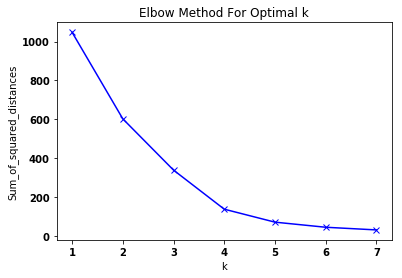

In [236]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}

plt.rc('font', **font)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [237]:
num_clusters = 2

km = KMeans(n_clusters=num_clusters)

km.fit(tfidf_matrix)
#km.labels_
clusters = km.labels_.tolist()
#km.cluster_centers
centers = km.cluster_centers_
print(f"the cluster centers are {centers}")

joblib.dump(km,  'doc_cluster_best_K.pkl')

the cluster centers are [[0.35669121 0.05444705 0.25278459]
 [0.25678658 0.89016182 0.00962847]]


['doc_cluster_best_K.pkl']

In [238]:
print(km.cluster_centers_)
print(km.cluster_centers_.shape)

[[0.35669121 0.05444705 0.25278459]
 [0.25678658 0.89016182 0.00962847]]
(2, 3)


In [240]:
km.cluster_centers_.argsort()

array([[1, 2, 0],
       [2, 0, 1]], dtype=int64)

In [241]:
## Reversing the list so that index of max element is in 0th index
km.cluster_centers_.argsort()[:,::-1]

array([[0, 2, 1],
       [1, 0, 2]], dtype=int64)

In [243]:
terms = tfidf_vectorizer.get_feature_names()

In [244]:
print(type(terms))
terms[:5]

<class 'list'>


['love', 'movi', 'stori']

In [245]:
from __future__ import print_function

print("Top terms per cluster:")

#sort cluster centers by proximity to centroid and picking the top 6 words per cluster
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 
for i in range(num_clusters):
    print()
    print("Top words in Cluster-%d :" % i, end='')
    print()
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        print('%s' % terms[ind].split(' '), end=',')

Top terms per cluster:

Top words in Cluster-0 :
['love'],['stori'],['movi'],
Top words in Cluster-1 :
['movi'],['love'],['stori'],

In [264]:
data['cluster_group'] = clusters
data.pop('clean_text_stemmed', None)

In [265]:
data.keys()

dict_keys(['index', 'Unnamed: 0', 'UsedID', 'UserName', 'Review', 'Rating', 'Date', 'clean_text_lemmatized', 'text_stemmed', 'text_lemmatized', 'cluster_group'])

In [274]:
d1 = pd.DataFrame(data['cluster_group'])

In [271]:
d1.columns

RangeIndex(start=0, stop=1, step=1)

In [272]:
data['cluster_group'].value_counts()

AttributeError: 'list' object has no attribute 'value_counts'